<a href="https://colab.research.google.com/github/Ghanashri-m/CMPE255/blob/prashanth-branch/02_imputation_visualization_analysis_encoding_fadd_avprashanth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import all the necessary libraries

In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

warnings.filterwarnings("ignore")
# pd.set_option('display.max_columns', None)
sns.set_style('darkgrid')

# Load the dataset

In [2]:
train_data = pd.read_csv("./data/train_data.csv")
test_data = pd.read_csv("./data/test_data.csv")

# Creating a copy of the dataframe to avoid indices conflicts in future
copy_train = train_data.copy()
copy_test = test_data.copy()
test_dataset = copy_test 

In [3]:
copy_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [4]:
copy_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [5]:
sample_submission= pd.read_csv("./data/sample_submission.csv")

In [6]:
sample_submission.head(5)

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


This means that we have to keep the id. Because it will be included in the finals submission and the target variable is the **Salesprice**.

In [7]:
# Combining the train and test data for data cleaning purpose

housing_dataset = pd.concat([copy_train, copy_test], axis=0,sort=False)
housing_dataset

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN


<AxesSubplot:>

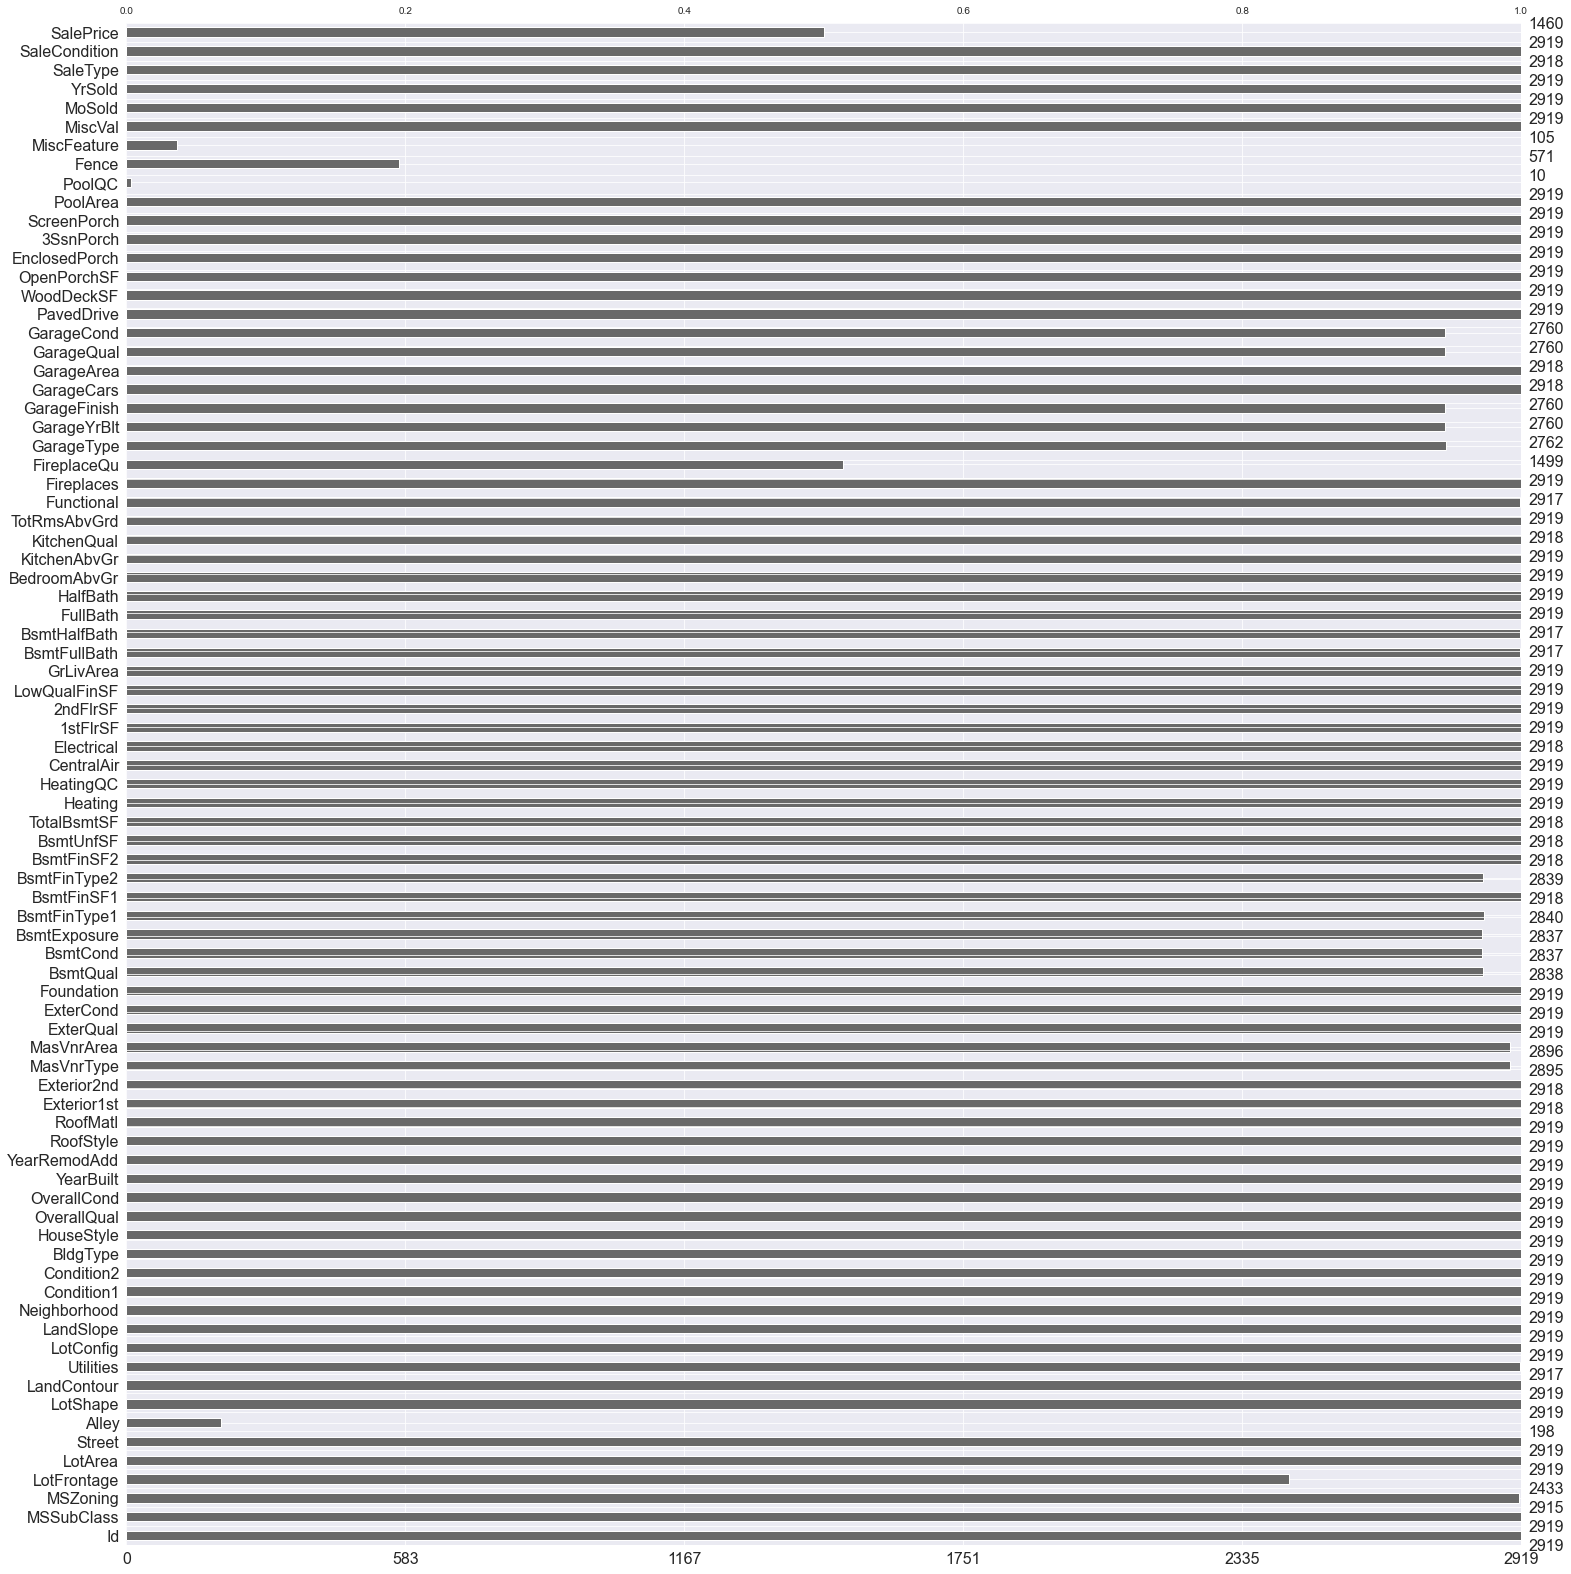

In [8]:
msno.bar(housing_dataset)

The above plot gives us an estimation on the number of null values in each column

<AxesSubplot:>

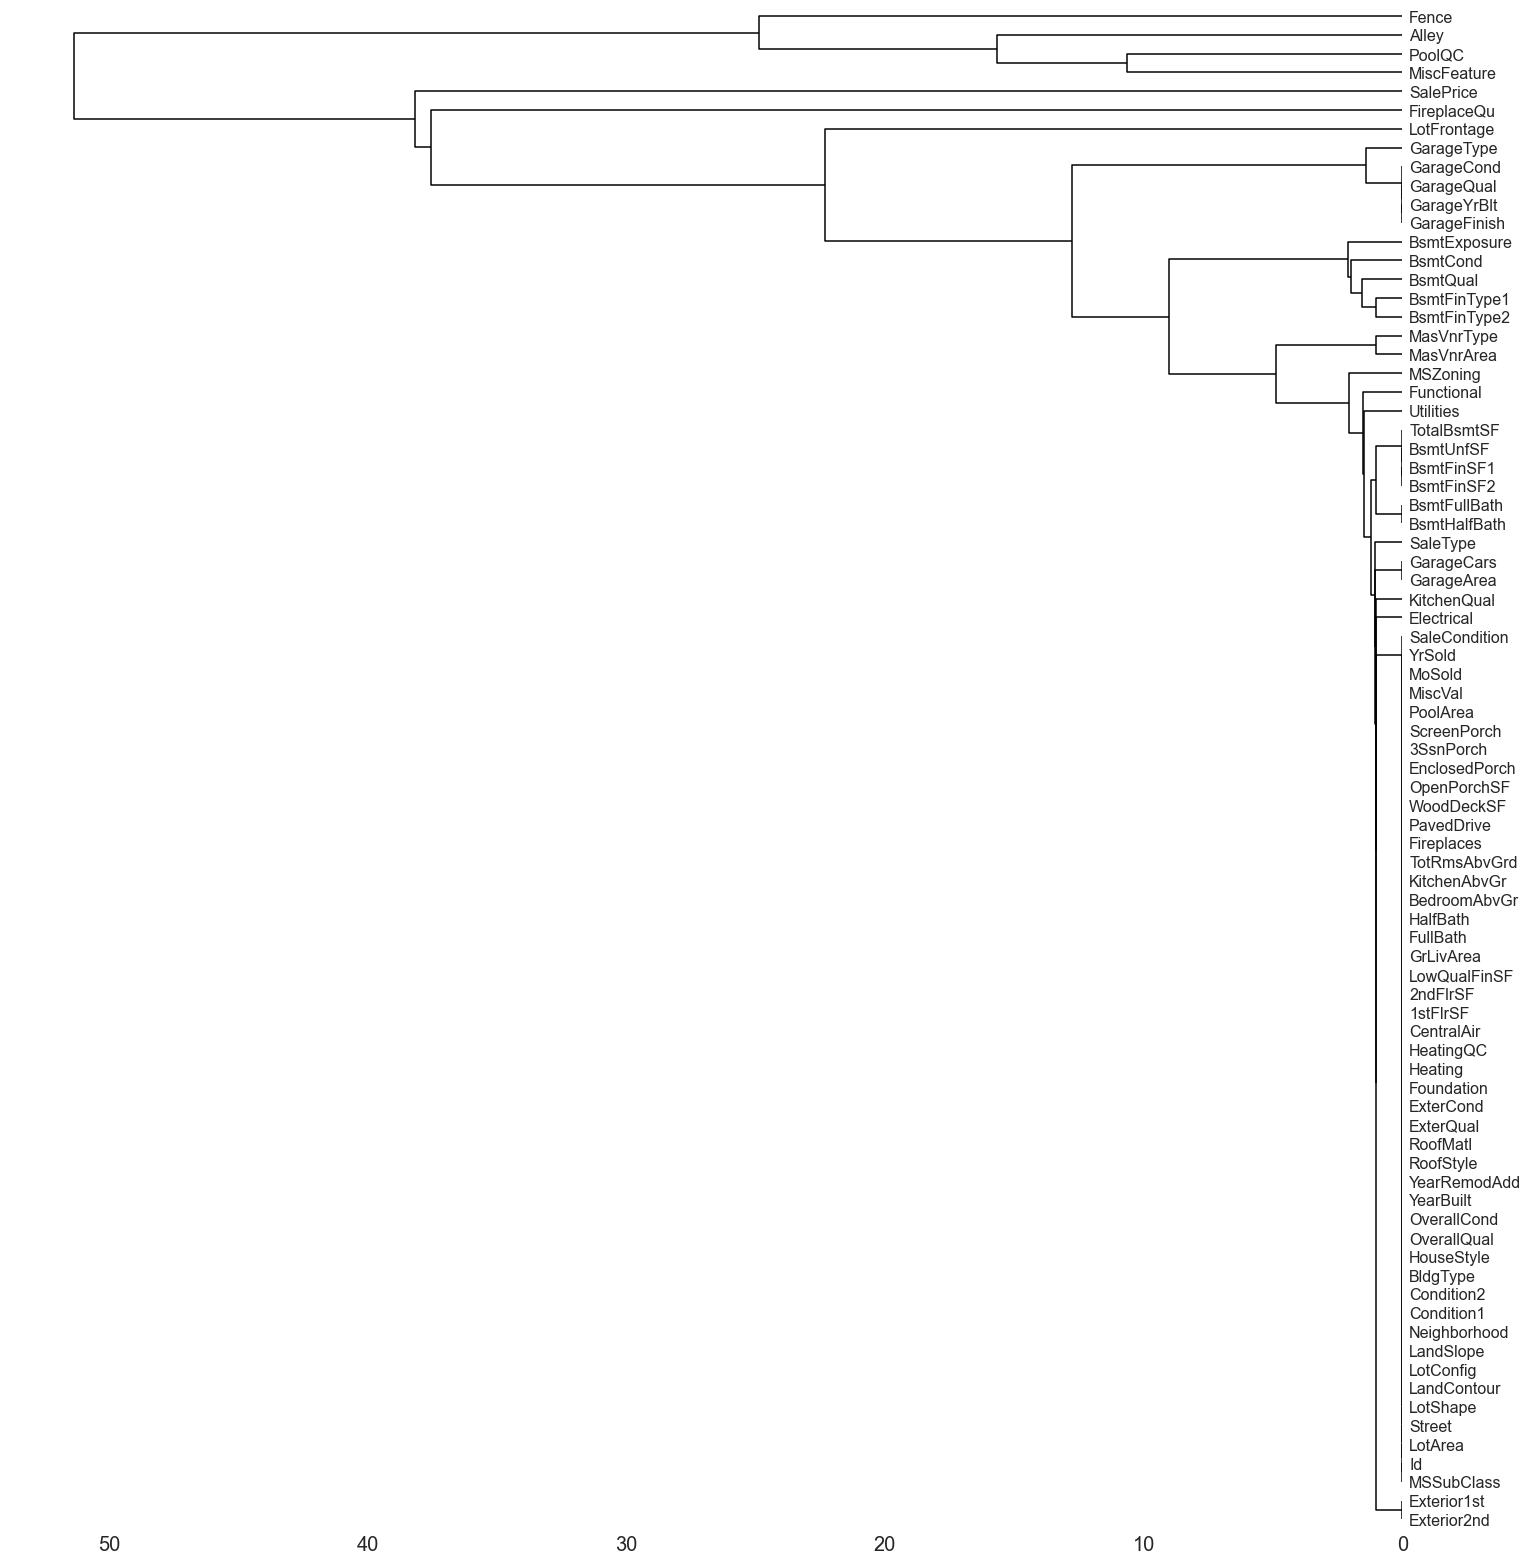

In [9]:
msno.dendrogram(housing_dataset)

The dendrogram plot provides a tree-like graph generated through hierarchical clustering and groups together columns that have strong correlations in nullity.

# Clean Data



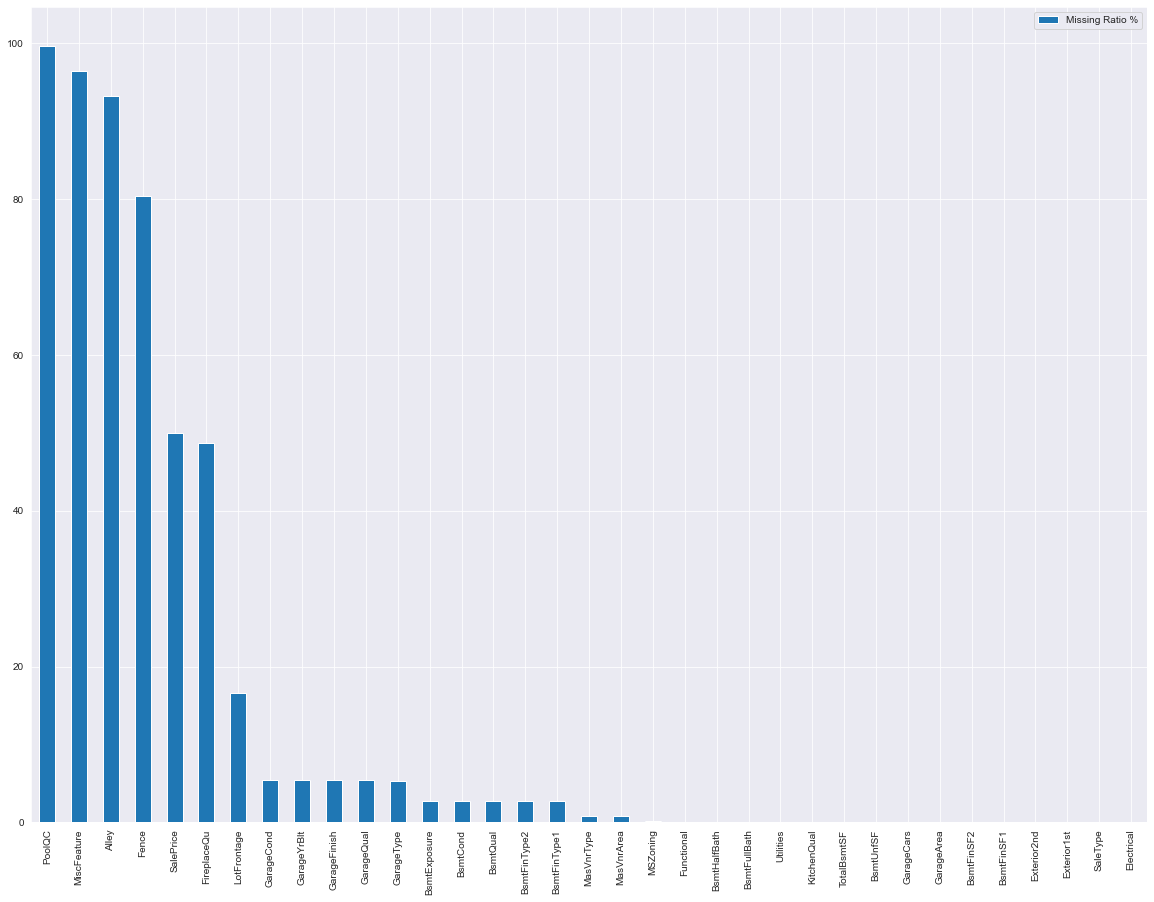

In [10]:
def plot_nas(df: pd.DataFrame):
    if df.isnull().sum().sum() != 0:
        plot_width, plot_height = (20,15)
        plt.rcParams['figure.figsize'] = (plot_width,plot_height)
        na_df = (df.isnull().sum() / len(df)) * 100      
        na_df = na_df.drop(na_df[na_df == 0].index).sort_values(ascending=False)
        missing_data = pd.DataFrame({'Missing Ratio %' :na_df})
        missing_data.plot(kind = "bar")
        plt.show()
    else:
        print('No NANs found')
plot_nas(housing_dataset)

Percentage of missing values

In [11]:
NAN = [(col, housing_dataset[col].isna().mean()*100) for col in housing_dataset]
NAN = pd.DataFrame(NAN, columns=["column_name", "percentage"])

In [12]:
NAN = NAN[NAN.percentage > 80]
NAN.sort_values("percentage", ascending=False)

,column_name,percentage
72,PoolQC,99.657417
74,MiscFeature,96.402878
6,Alley,93.216855
73,Fence,80.438506


In [13]:
housing_dataset.shape

(2919, 81)

In [14]:
#From above we can identify that the columns PoolQC, MiscFeature, Alley and Fence contain significant amount of null values and we can get rid of these colums
housing_dataset = housing_dataset.drop(axis = 1, columns="PoolQC")
housing_dataset = housing_dataset.drop(axis = 1, columns="MiscFeature")
housing_dataset = housing_dataset.drop(axis = 1, columns="Alley")
housing_dataset = housing_dataset.drop(axis = 1, columns="Fence")

In [15]:
housing_dataset.shape

(2919, 77)

Reduced shape of the dataframe after removing the columns which has more than 80 percent of null values

## Identifying the outliers by comparing the features "LotArea" & "GrLivArea" with SalePrice.

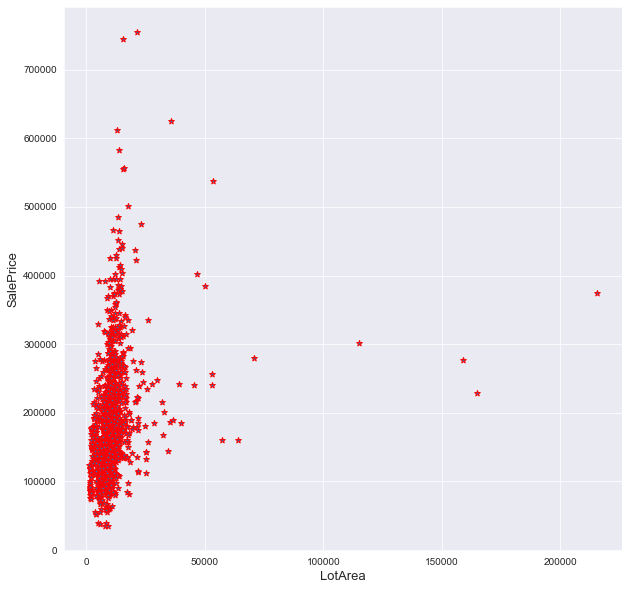

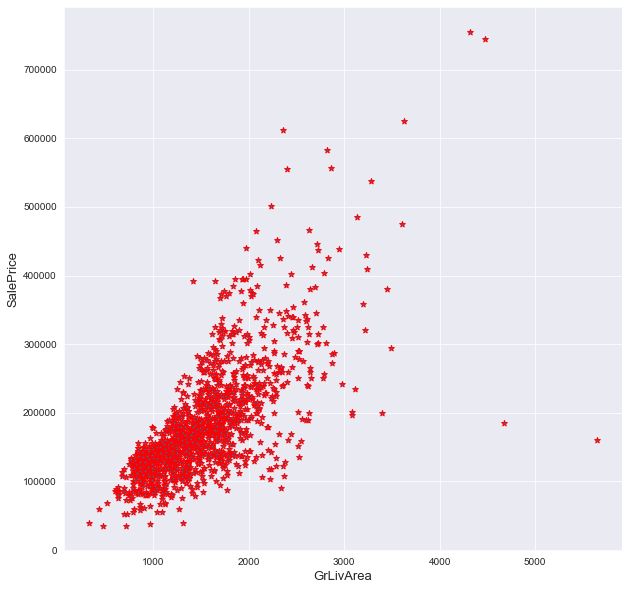

In [16]:
def outlier_visualization(feature):
    plt.figure(figsize=(10, 10))
    plt.scatter(x = housing_dataset[feature], y = housing_dataset['SalePrice'], marker = "*", edgecolors = "Red")
    plt.ylabel('SalePrice', fontsize=13)
    plt.xlabel(feature, fontsize=13)
    plt.show()

outlier_visualization('LotArea')
outlier_visualization('GrLivArea')

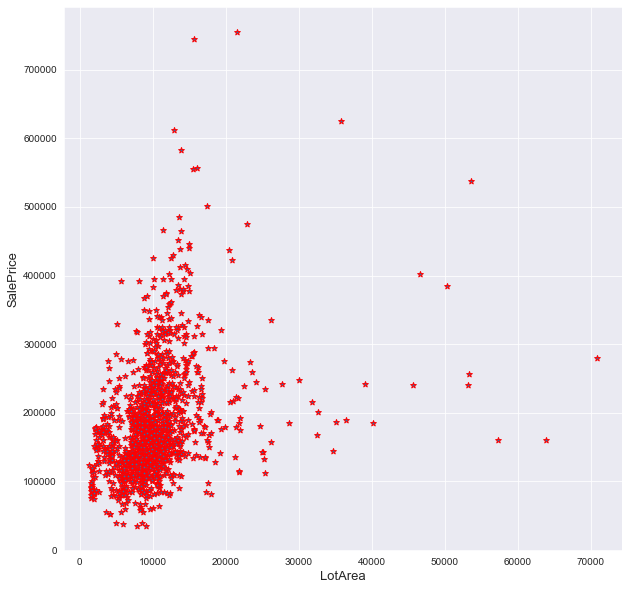

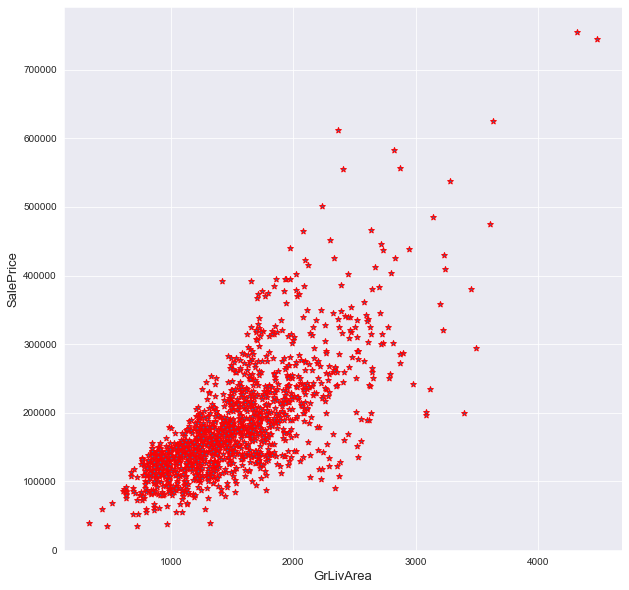

In [17]:

housing_dataset = housing_dataset.drop(housing_dataset[(housing_dataset['LotArea']>100000) & (housing_dataset['SalePrice']<400000)].index)

outlier_visualization('LotArea')

housing_dataset = housing_dataset.drop(housing_dataset[(housing_dataset['GrLivArea']>4000) & (housing_dataset['SalePrice']<300000)].index)
outlier_visualization('GrLivArea')

## Logarithmic Transformation


 mu = 180921.20 and sigma = 79415.29



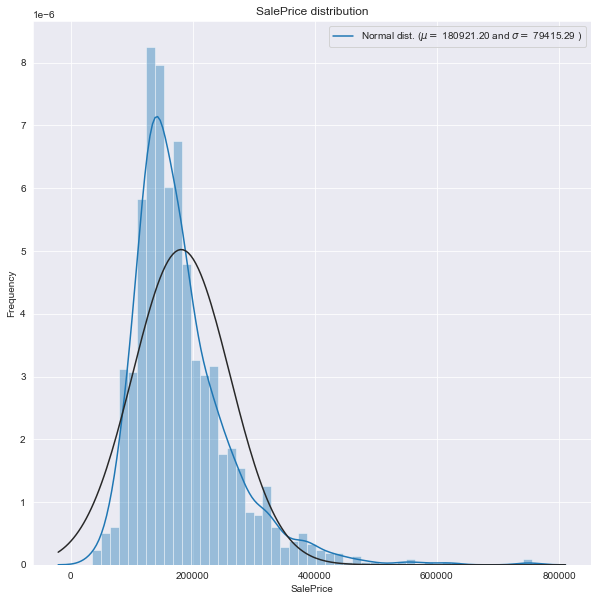

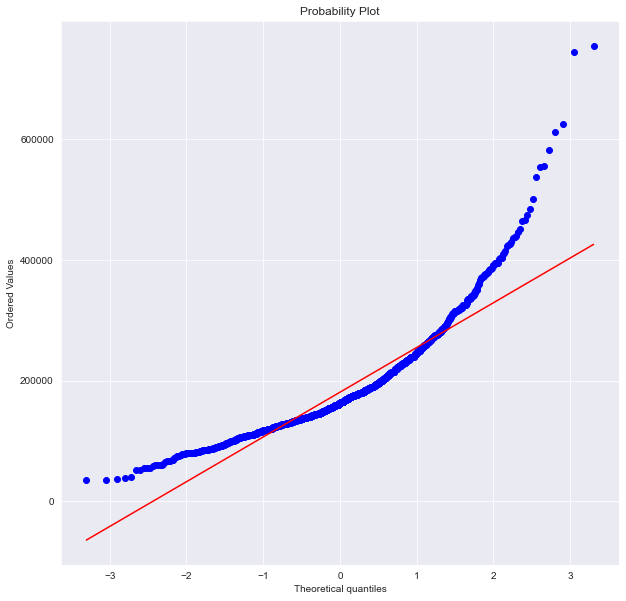

In [18]:
from scipy.stats import skew, norm, probplot
y = copy_train['SalePrice']
fig = plt.figure(figsize=(10,10))
sns.distplot(y , fit=norm);

(mu, sigma) = norm.fit(y)
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

# QQ-plot
fig = plt.figure(figsize=(10,10))
res = probplot(y, plot=plt)
plt.show()

## Plotting displot for the Saleprice


 mu = 12.02 and sigma = 0.40



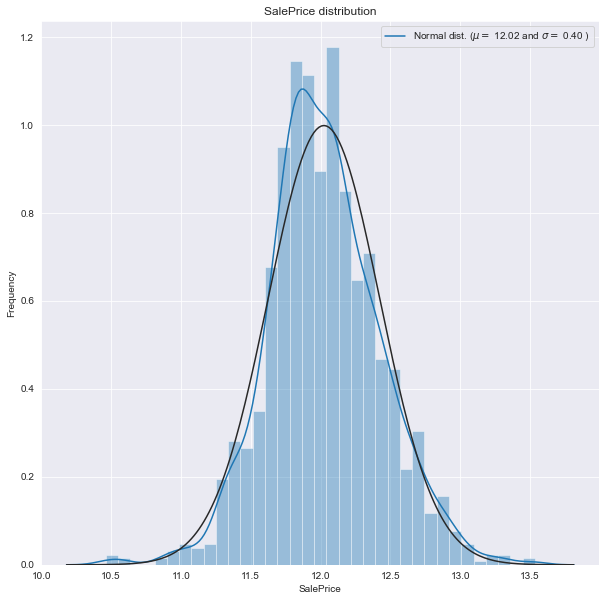

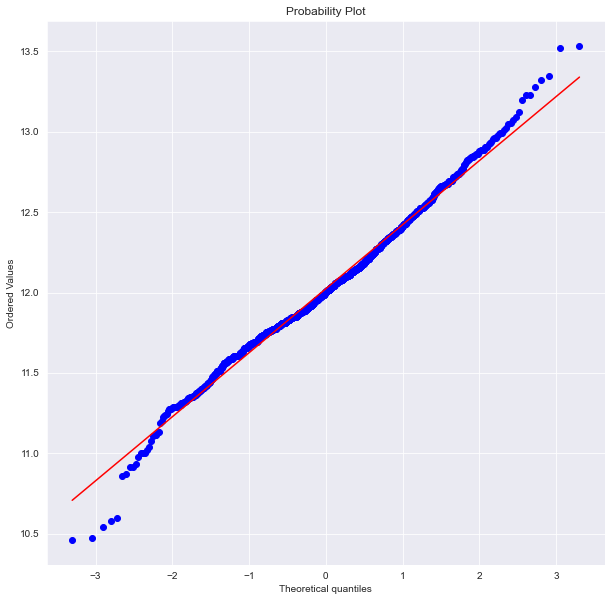

In [19]:
y = np.log( copy_train['SalePrice'])

fig = plt.figure(figsize=(10,10))
sns.distplot(y , fit=norm);
(mu, sigma) = norm.fit(y)
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

fig = plt.figure(figsize=(10,10))
res = probplot(y, plot=plt)
plt.show()

In [20]:
housing_dataset = pd.concat([copy_train, copy_test], axis=0,sort=False)
housing_dataset = housing_dataset.drop(axis = 1, columns="PoolQC")
housing_dataset = housing_dataset.drop(axis = 1, columns="MiscFeature")
housing_dataset = housing_dataset.drop(axis = 1, columns="Alley")
housing_dataset = housing_dataset.drop(axis = 1, columns="Fence")
housing_dataset

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,6,2006,WD,Normal,NaN
1455,2916,160,RM,21.0,1894,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,4,2006,WD,Abnorml,NaN
1456,2917,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2006,WD,Abnorml,NaN
1457,2918,85,RL,62.0,10441,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,700,7,2006,WD,Normal,NaN


## Splitting into numerical and categorical data


In [21]:
categorical_columns = housing_dataset.select_dtypes(include=['object'])
numeric_columns = housing_dataset.select_dtypes(exclude=['object'])

Splitting the dataframe into the columns which has numerical and categorical features into object_columns and numeric_columns respectively.

In [22]:
len(categorical_columns.columns)

39

In [23]:
len(numeric_columns.columns)

38

In total it can be seen that there are in total 39 and 38 columns which are categorical and numeric respectively.

In [24]:
categorical_columns.dtypes

MSZoning         object
Street           object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Heating          object
HeatingQC        object
CentralAir       object
Electrical       object
KitchenQual      object
Functional       object
FireplaceQu      object
GarageType       object
GarageFinish     object
GarageQual       object
GarageCond       object
PavedDrive       object
SaleType         object
SaleCondition    object
dtype: object

In [25]:
numeric_columns.dtypes

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1       float64
BsmtFinSF2       float64
BsmtUnfSF        float64
TotalBsmtSF      float64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath     float64
BsmtHalfBath     float64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars       float64
GarageArea       float64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice        float64
dtype: object

In [26]:
null_categorical_counts = categorical_columns.isnull().sum()
print("Null values in each column:\n{}".format(null_categorical_counts))

Null values in each column:
MSZoning            4
Street              0
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         24
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           81
BsmtCond           82
BsmtExposure       82
BsmtFinType1       79
BsmtFinType2       80
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         1
Functional          2
FireplaceQu      1420
GarageType        157
GarageFinish      159
GarageQual        159
GarageCond        159
PavedDrive          0
SaleType            1
SaleCondition       0
dtype: int64


## Imputing Missing Values

In [27]:
for (columnName, columnData) in categorical_columns.iteritems():
    print('Column Name : ', columnName)
    print('Column Contents : ', columnData.unique())
    print('Total unique value counts : ', len(columnData.unique()))

Column Name :  MSZoning
Column Contents :  ['RL' 'RM' 'C (all)' 'FV' 'RH' nan]
Total unique value counts :  6
Column Name :  Street
Column Contents :  ['Pave' 'Grvl']
Total unique value counts :  2
Column Name :  LotShape
Column Contents :  ['Reg' 'IR1' 'IR2' 'IR3']
Total unique value counts :  4
Column Name :  LandContour
Column Contents :  ['Lvl' 'Bnk' 'Low' 'HLS']
Total unique value counts :  4
Column Name :  Utilities
Column Contents :  ['AllPub' 'NoSeWa' nan]
Total unique value counts :  3
Column Name :  LotConfig
Column Contents :  ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
Total unique value counts :  5
Column Name :  LandSlope
Column Contents :  ['Gtl' 'Mod' 'Sev']
Total unique value counts :  3
Column Name :  Neighborhood
Column Contents :  ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blues

From the above list of unique values for each column, we pick the columns that have nan values present in them. Essentially these -> (MSZoning, Utilities, Exterior1st, Exterior2nd, MasVnrType, BsmtQual, BsmtExposure, BsmtFinType1, BsmtFinType2, Electrical, KitchenQual, Functional, FireplaceQu, GarageType, GarageFinish, GarageQual, GarageCond, SaleType, BsmtCond)

In [28]:
none_categorical_columns = ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','GarageType','GarageFinish','GarageQual','FireplaceQu','GarageCond']
categorical_columns[none_categorical_columns] = categorical_columns[none_categorical_columns].fillna('None')

null_categorical_counts = categorical_columns.isnull().sum()
print("Null values in each column:\n{}".format(null_categorical_counts))

Null values in each column:
MSZoning          4
Street            0
LotShape          0
LandContour       0
Utilities         2
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
RoofStyle         0
RoofMatl          0
Exterior1st       1
Exterior2nd       1
MasVnrType       24
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual          0
BsmtCond          0
BsmtExposure      0
BsmtFinType1      0
BsmtFinType2      0
Heating           0
HeatingQC         0
CentralAir        0
Electrical        1
KitchenQual       1
Functional        2
FireplaceQu       0
GarageType        0
GarageFinish      0
GarageQual        0
GarageCond        0
PavedDrive        0
SaleType          1
SaleCondition     0
dtype: int64


In [29]:
fewmiss_categorical_columns = ['MasVnrType', 'Electrical', 'MSZoning','Utilities','Exterior1st','Exterior2nd','SaleType', 'KitchenQual','Functional']
categorical_columns[fewmiss_categorical_columns] = categorical_columns[fewmiss_categorical_columns].fillna(categorical_columns.mode().iloc[0])

null_categorical_counts = categorical_columns.isnull().sum()
print("Null values in each column:\n{}".format(null_categorical_counts))

Null values in each column:
MSZoning         0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
SaleType         0
SaleCondition    0
dtype: int64


In [30]:
count_unique = categorical_columns.nunique()
unique_val = pd.DataFrame(count_unique, columns=["Unique_vals"])

In [31]:
unique_val

,Unique_vals
MSZoning,5
Street,2
LotShape,4
LandContour,4
Utilities,2
LotConfig,5
LandSlope,3
Neighborhood,25
Condition1,9
Condition2,8


In [32]:
unique_df = pd.read_csv("./data/unique_vals.csv")
unique_df.head(10)

,index,Unique_vals
0,MSZoning,5
1,LotShape,4
2,LandContour,4
3,LotConfig,5
4,LandSlope,3
5,Neighborhood,25
6,Condition1,9
7,BldgType,5
8,HouseStyle,8
9,RoofStyle,6


[Text(0, 0, 'MSZoning'),
 Text(1, 0, 'LotShape'),
 Text(2, 0, 'LandContour'),
 Text(3, 0, 'LotConfig'),
 Text(4, 0, 'LandSlope'),
 Text(5, 0, 'Neighborhood'),
 Text(6, 0, 'Condition1'),
 Text(7, 0, 'BldgType'),
 Text(8, 0, 'HouseStyle'),
 Text(9, 0, 'RoofStyle'),
 Text(10, 0, 'Exterior1st'),
 Text(11, 0, 'Exterior2nd'),
 Text(12, 0, 'MasVnrType'),
 Text(13, 0, 'ExterQual'),
 Text(14, 0, 'ExterCond'),
 Text(15, 0, 'Foundation'),
 Text(16, 0, 'BsmtQual'),
 Text(17, 0, 'BsmtCond'),
 Text(18, 0, 'BsmtExposure'),
 Text(19, 0, 'BsmtFinType1'),
 Text(20, 0, 'BsmtFinType2'),
 Text(21, 0, 'HeatingQC'),
 Text(22, 0, 'CentralAir'),
 Text(23, 0, 'Electrical'),
 Text(24, 0, 'KitchenQual'),
 Text(25, 0, 'Functional'),
 Text(26, 0, 'FireplaceQu'),
 Text(27, 0, 'GarageType'),
 Text(28, 0, 'GarageFinish'),
 Text(29, 0, 'GarageQual'),
 Text(30, 0, 'GarageCond'),
 Text(31, 0, 'PavedDrive'),
 Text(32, 0, 'SaleType'),
 Text(33, 0, 'SaleCondition'),
 Text(34, 0, 'MasVnrArea'),
 Text(35, 0, 'BsmtFinSF1'),
 T

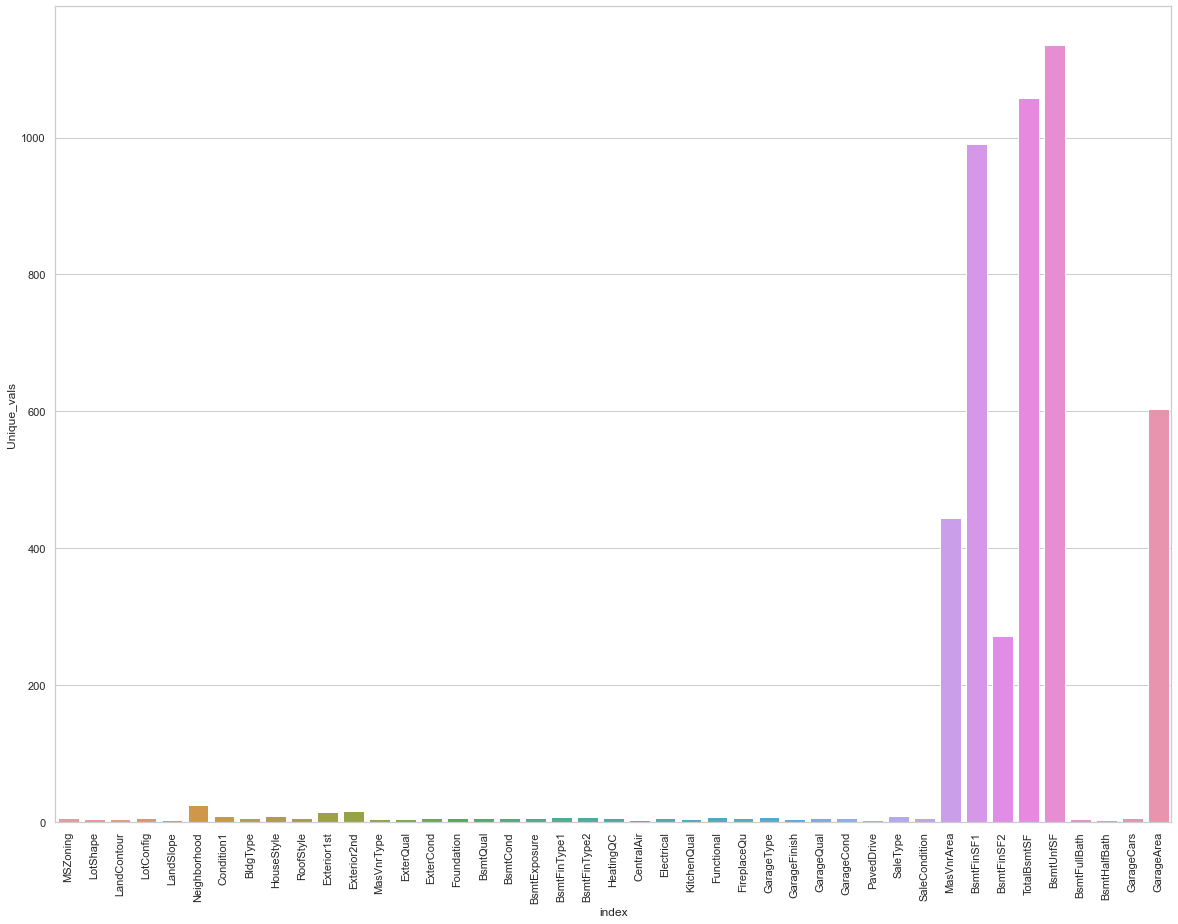

In [33]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="index", y="Unique_vals",data=unique_df)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

In [34]:
unique_df = unique_df.loc[unique_df['Unique_vals']<=9]
unique_df

,index,Unique_vals
0,MSZoning,5
1,LotShape,4
2,LandContour,4
3,LotConfig,5
4,LandSlope,3
6,Condition1,9
7,BldgType,5
8,HouseStyle,8
9,RoofStyle,6
12,MasVnrType,4


[Text(0, 0, 'MSZoning'),
 Text(1, 0, 'LotShape'),
 Text(2, 0, 'LandContour'),
 Text(3, 0, 'LotConfig'),
 Text(4, 0, 'LandSlope'),
 Text(5, 0, 'Condition1'),
 Text(6, 0, 'BldgType'),
 Text(7, 0, 'HouseStyle'),
 Text(8, 0, 'RoofStyle'),
 Text(9, 0, 'MasVnrType'),
 Text(10, 0, 'ExterQual'),
 Text(11, 0, 'ExterCond'),
 Text(12, 0, 'Foundation'),
 Text(13, 0, 'BsmtQual'),
 Text(14, 0, 'BsmtCond'),
 Text(15, 0, 'BsmtExposure'),
 Text(16, 0, 'BsmtFinType1'),
 Text(17, 0, 'BsmtFinType2'),
 Text(18, 0, 'HeatingQC'),
 Text(19, 0, 'CentralAir'),
 Text(20, 0, 'Electrical'),
 Text(21, 0, 'KitchenQual'),
 Text(22, 0, 'Functional'),
 Text(23, 0, 'FireplaceQu'),
 Text(24, 0, 'GarageType'),
 Text(25, 0, 'GarageFinish'),
 Text(26, 0, 'GarageQual'),
 Text(27, 0, 'GarageCond'),
 Text(28, 0, 'PavedDrive'),
 Text(29, 0, 'SaleType'),
 Text(30, 0, 'SaleCondition'),
 Text(31, 0, 'BsmtFullBath'),
 Text(32, 0, 'BsmtHalfBath'),
 Text(33, 0, 'GarageCars')]

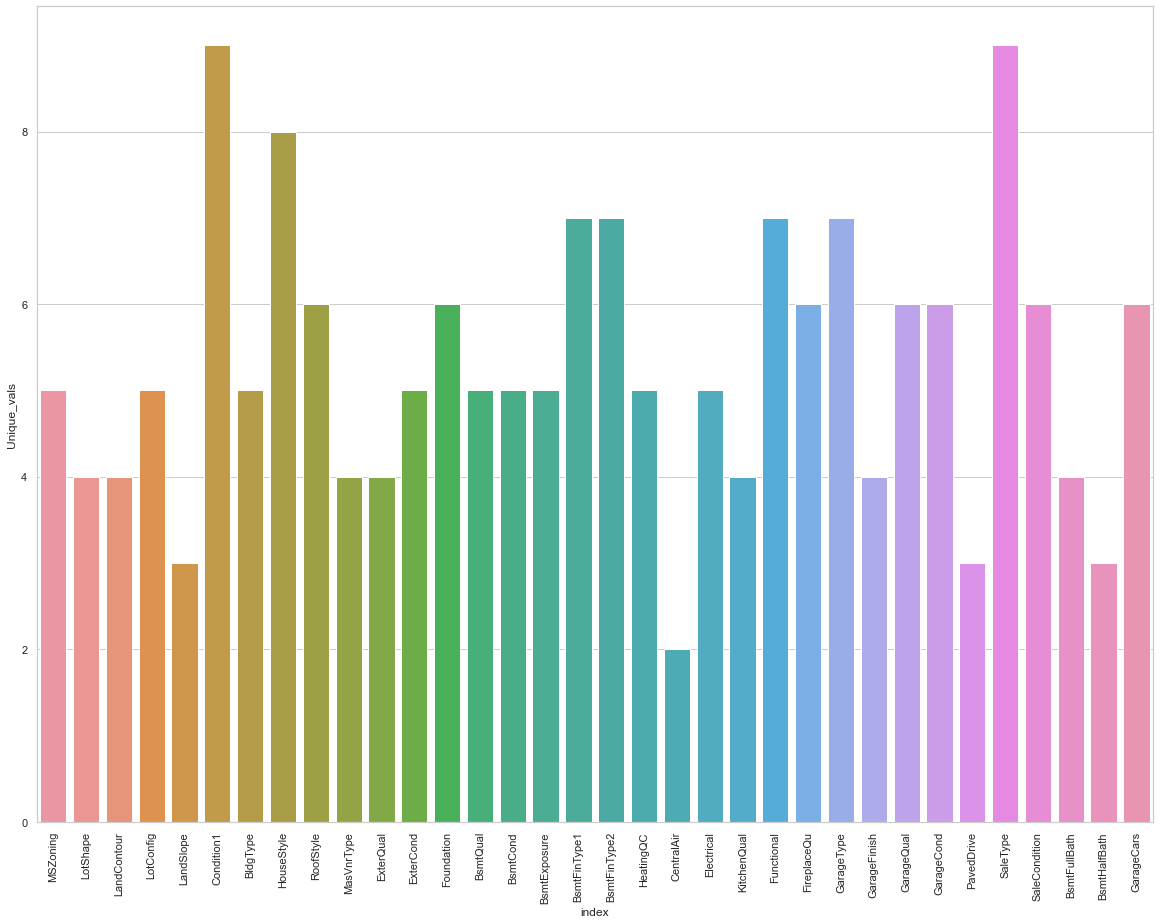

In [35]:
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="index", y="Unique_vals",data=unique_df)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

In [36]:
null_numeric_counts = numeric_columns.isnull().sum()
print("Null values in each column:\n{}".format(null_numeric_counts))

Null values in each column:
Id                  0
MSSubClass          0
LotFrontage       486
LotArea             0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
MasVnrArea         23
BsmtFinSF1          1
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea           0
BsmtFullBath        2
BsmtHalfBath        2
FullBath            0
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
TotRmsAbvGrd        0
Fireplaces          0
GarageYrBlt       159
GarageCars          1
GarageArea          1
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SalePrice        1459
dtype: int64


In [37]:
for (columnName, columnData) in numeric_columns.iteritems():
    print('Column Name : ', columnName)
    print('Column Contents : ', columnData.unique())
    print('Total unique value counts : ', len(columnData.unique()))

Column Name :  Id
Column Contents :  [   1    2    3 ... 2917 2918 2919]
Total unique value counts :  2919
Column Name :  MSSubClass
Column Contents :  [ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40 150]
Total unique value counts :  16
Column Name :  LotFrontage
Column Contents :  [ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39.
 144. 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.  26.
  25. 119.  31.  28. 117. 113. 125. 135. 136.  22. 123. 195. 155. 126.
 200. 131. 133.]
Total unique value counts :  129
Column Name :  

In [38]:
numeric_columns['GarageCars'] = numeric_columns['GarageCars'].fillna(0)

In [39]:
print(numeric_columns["LotFrontage"].mean())

69.30579531442663


In [40]:
numeric_columns['LotFrontage'] = numeric_columns['LotFrontage'].fillna(numeric_columns["LotFrontage"].mean())

In [41]:
print(numeric_columns['GarageYrBlt'])

0       2003.0
1       1976.0
2       2001.0
3       1998.0
4       2000.0
         ...  
1454       NaN
1455    1970.0
1456    1960.0
1457       NaN
1458    1993.0
Name: GarageYrBlt, Length: 2919, dtype: float64


In [42]:
print((numeric_columns["YrSold"]-numeric_columns["YearBuilt"]).median())

35.0


In [43]:
numeric_columns['GarageYrBlt'] = numeric_columns['GarageYrBlt'].fillna(numeric_columns['YrSold']-35)

In [44]:
null_numeric_counts = numeric_columns.isnull().sum()
print("Null values in each column:\n{}".format(null_numeric_counts))

Null values in each column:
Id                  0
MSSubClass          0
LotFrontage         0
LotArea             0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
MasVnrArea         23
BsmtFinSF1          1
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea           0
BsmtFullBath        2
BsmtHalfBath        2
FullBath            0
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
TotRmsAbvGrd        0
Fireplaces          0
GarageYrBlt         0
GarageCars          0
GarageArea          1
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SalePrice        1459
dtype: int64


In [45]:
fewmiss_numeric_columns = ['MasVnrArea','BsmtFinSF1','BsmtFinSF2','TotalBsmtSF','BsmtUnfSF','BsmtFullBath','BsmtHalfBath','GarageCars','GarageArea']
numeric_columns[fewmiss_numeric_columns] = numeric_columns[fewmiss_numeric_columns].fillna(numeric_columns.mode().iloc[0])

In [46]:
numeric_columns.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

# Column-wise Variance Plotting

RL         2269
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64

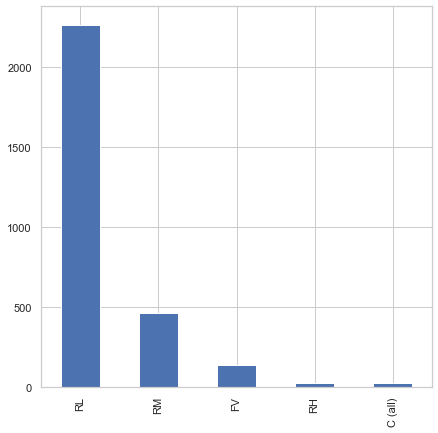

In [47]:
categorical_columns['MSZoning'].value_counts().plot(kind='bar',figsize=[7,7])
categorical_columns['MSZoning'].value_counts() 

Pave    2907
Grvl      12
Name: Street, dtype: int64

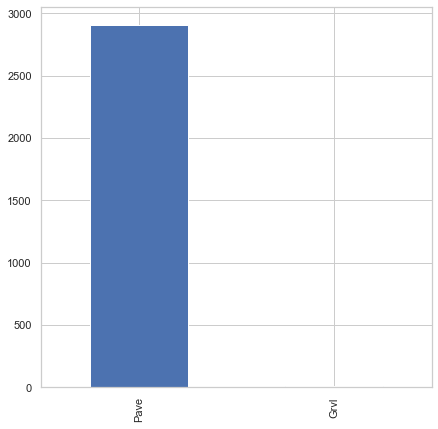

In [48]:
categorical_columns['Street'].value_counts().plot(kind='bar',figsize=[7,7])
categorical_columns['Street'].value_counts() 

Reg    1859
IR1     968
IR2      76
IR3      16
Name: LotShape, dtype: int64

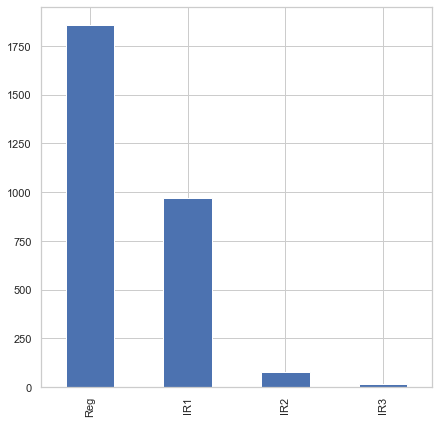

In [49]:
categorical_columns['LotShape'].value_counts().plot(kind='bar',figsize=[7,7])
categorical_columns['LotShape'].value_counts() 

Lvl    2622
HLS     120
Bnk     117
Low      60
Name: LandContour, dtype: int64

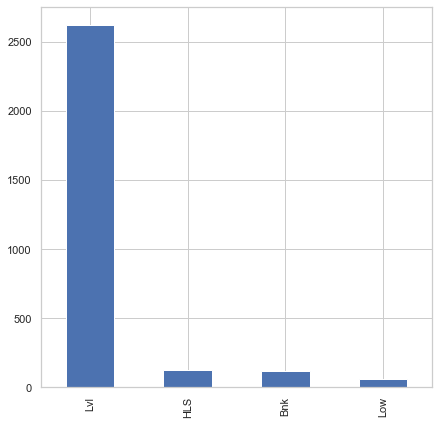

In [50]:
categorical_columns['LandContour'].value_counts().plot(kind='bar',figsize=[7,7])
categorical_columns['LandContour'].value_counts() 

AllPub    2918
NoSeWa       1
Name: Utilities, dtype: int64

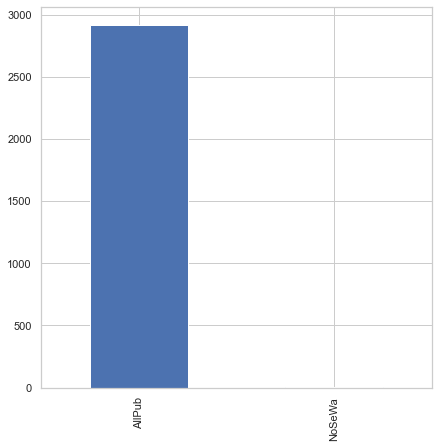

In [51]:
categorical_columns['Utilities'].value_counts().plot(kind='bar',figsize=[7,7])
categorical_columns['Utilities'].value_counts() 

Inside     2133
Corner      511
CulDSac     176
FR2          85
FR3          14
Name: LotConfig, dtype: int64

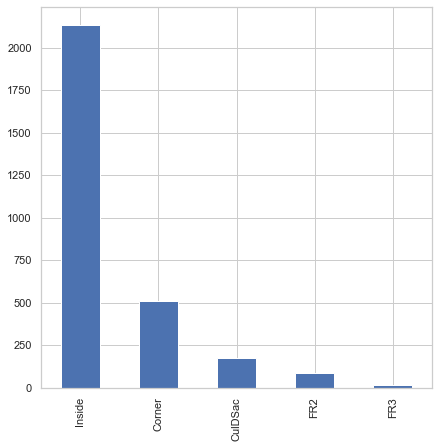

In [52]:
categorical_columns['LotConfig'].value_counts().plot(kind='bar',figsize=[7,7])
categorical_columns['LotConfig'].value_counts() 

Gtl    2778
Mod     125
Sev      16
Name: LandSlope, dtype: int64

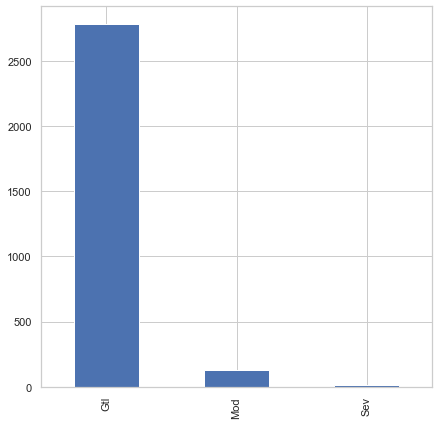

In [53]:
categorical_columns['LandSlope'].value_counts().plot(kind='bar',figsize=[7,7])
categorical_columns['LandSlope'].value_counts() 

NAmes      443
CollgCr    267
OldTown    239
Edwards    194
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    108
Crawfor    103
IDOTRR      93
Timber      72
NoRidge     71
StoneBr     51
SWISU       48
ClearCr     44
MeadowV     37
BrDale      30
Blmngtn     28
Veenker     24
NPkVill     23
Blueste     10
Name: Neighborhood, dtype: int64

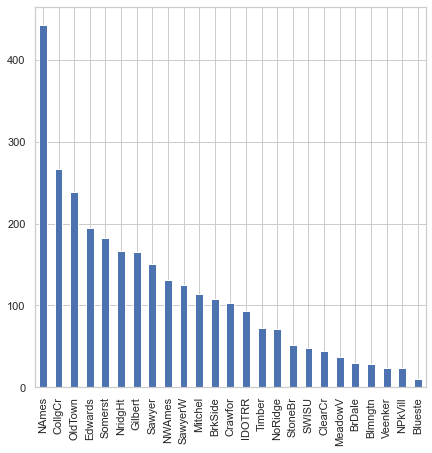

In [54]:
categorical_columns['Neighborhood'].value_counts().plot(kind='bar',figsize=[7,7])
categorical_columns['Neighborhood'].value_counts() 

Norm      2511
Feedr      164
Artery      92
RRAn        50
PosN        39
RRAe        28
PosA        20
RRNn         9
RRNe         6
Name: Condition1, dtype: int64

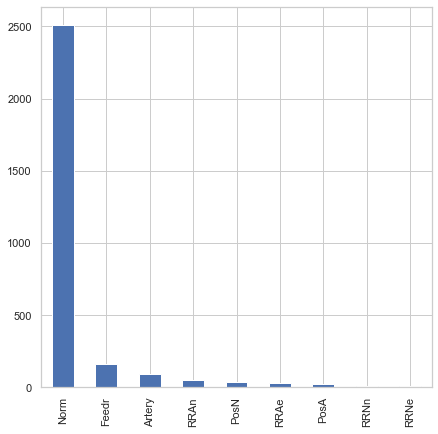

In [55]:
categorical_columns['Condition1'].value_counts().plot(kind='bar',figsize=[7,7])
categorical_columns['Condition1'].value_counts() 

Norm      2889
Feedr       13
Artery       5
PosN         4
PosA         4
RRNn         2
RRAn         1
RRAe         1
Name: Condition2, dtype: int64

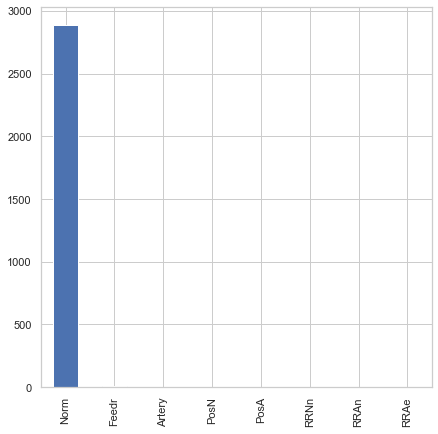

In [56]:
categorical_columns['Condition2'].value_counts().plot(kind='bar',figsize=[7,7])
categorical_columns['Condition2'].value_counts() 

1Fam      2425
TwnhsE     227
Duplex     109
Twnhs       96
2fmCon      62
Name: BldgType, dtype: int64

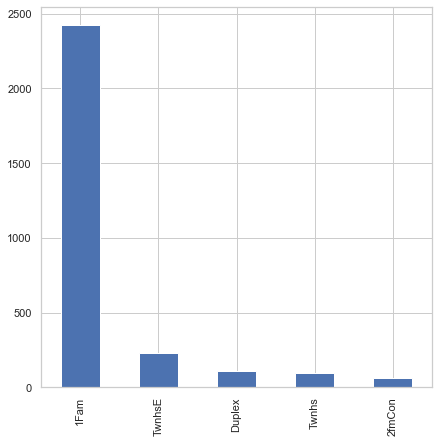

In [57]:
categorical_columns['BldgType'].value_counts().plot(kind='bar',figsize=[7,7])
categorical_columns['BldgType'].value_counts() 

1Story    1471
2Story     872
1.5Fin     314
SLvl       128
SFoyer      83
2.5Unf      24
1.5Unf      19
2.5Fin       8
Name: HouseStyle, dtype: int64

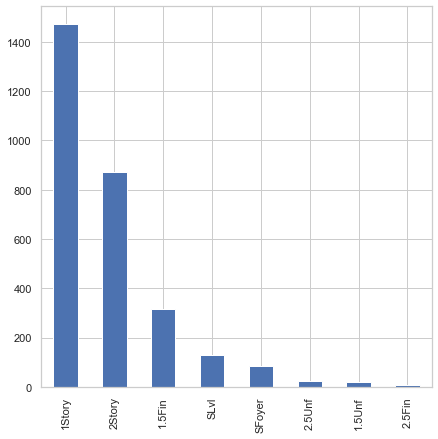

In [58]:
categorical_columns['HouseStyle'].value_counts().plot(kind='bar',figsize=[7,7])
categorical_columns['HouseStyle'].value_counts() 

Gable      2310
Hip         551
Gambrel      22
Flat         20
Mansard      11
Shed          5
Name: RoofStyle, dtype: int64

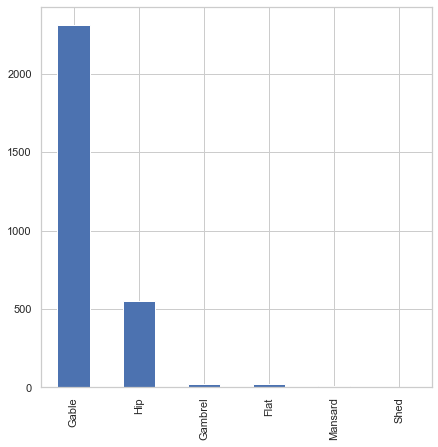

In [59]:
categorical_columns['RoofStyle'].value_counts().plot(kind='bar',figsize=[7,7])
categorical_columns['RoofStyle'].value_counts() 

CompShg    2876
Tar&Grv      23
WdShake       9
WdShngl       7
Metal         1
Membran       1
Roll          1
ClyTile       1
Name: RoofMatl, dtype: int64

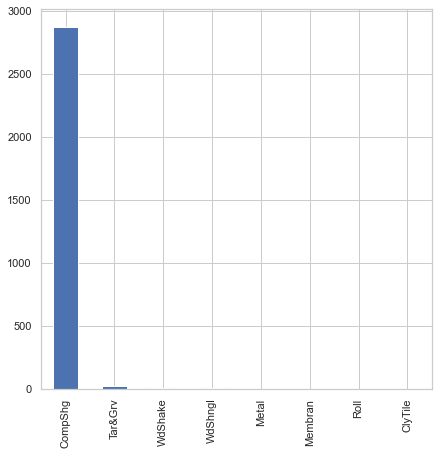

In [60]:
categorical_columns['RoofMatl'].value_counts().plot(kind='bar',figsize=[7,7])
categorical_columns['RoofMatl'].value_counts() 

VinylSd    1026
MetalSd     450
HdBoard     442
Wd Sdng     411
Plywood     221
CemntBd     126
BrkFace      87
WdShing      56
AsbShng      44
Stucco       43
BrkComm       6
AsphShn       2
Stone         2
CBlock        2
ImStucc       1
Name: Exterior1st, dtype: int64

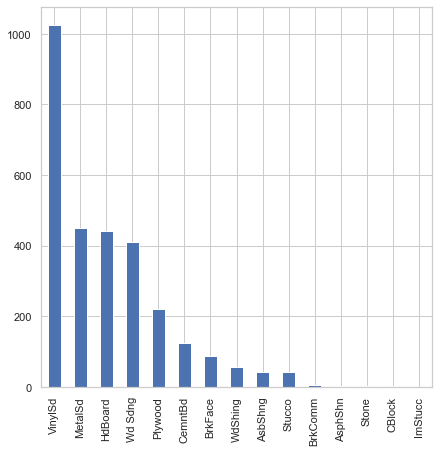

In [61]:
categorical_columns['Exterior1st'].value_counts().plot(kind='bar',figsize=[7,7])
categorical_columns['Exterior1st'].value_counts() 

VinylSd    1015
MetalSd     447
HdBoard     406
Wd Sdng     391
Plywood     270
CmentBd     126
Wd Shng      81
BrkFace      47
Stucco       47
AsbShng      38
Brk Cmn      22
ImStucc      15
Stone         6
AsphShn       4
CBlock        3
Other         1
Name: Exterior2nd, dtype: int64

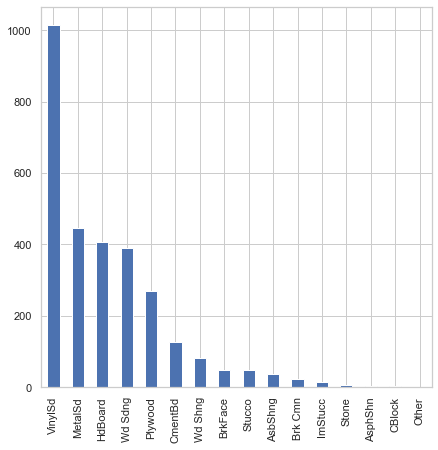

In [62]:
categorical_columns['Exterior2nd'].value_counts().plot(kind='bar',figsize=[7,7])
categorical_columns['Exterior2nd'].value_counts() 

None       1766
BrkFace     879
Stone       249
BrkCmn       25
Name: MasVnrType, dtype: int64

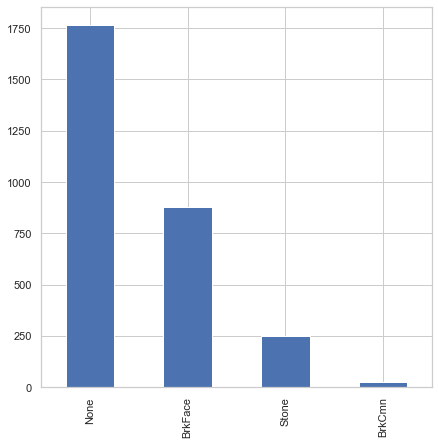

In [63]:
categorical_columns['MasVnrType'].value_counts().plot(kind='bar',figsize=[7,7])
categorical_columns['MasVnrType'].value_counts() 

TA    1798
Gd     979
Ex     107
Fa      35
Name: ExterQual, dtype: int64

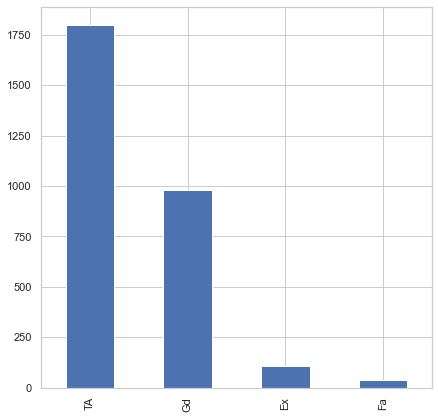

In [64]:
categorical_columns['ExterQual'].value_counts().plot(kind='bar',figsize=[7,7])
categorical_columns['ExterQual'].value_counts() 

TA    2538
Gd     299
Fa      67
Ex      12
Po       3
Name: ExterCond, dtype: int64

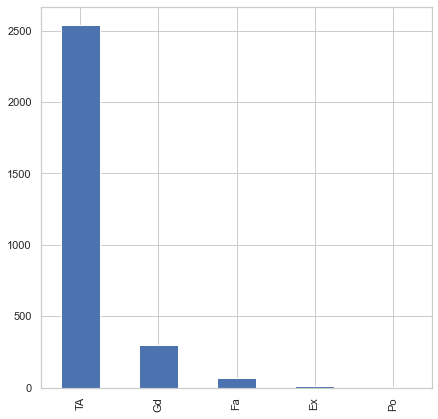

In [65]:
categorical_columns['ExterCond'].value_counts().plot(kind='bar',figsize=[7,7])
categorical_columns['ExterCond'].value_counts() 

PConc     1308
CBlock    1235
BrkTil     311
Slab        49
Stone       11
Wood         5
Name: Foundation, dtype: int64

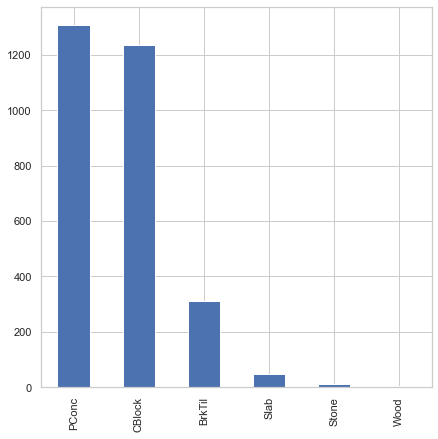

In [66]:
categorical_columns['Foundation'].value_counts().plot(kind='bar',figsize=[7,7])
categorical_columns['Foundation'].value_counts() 

TA      1283
Gd      1209
Ex       258
Fa        88
None      81
Name: BsmtQual, dtype: int64

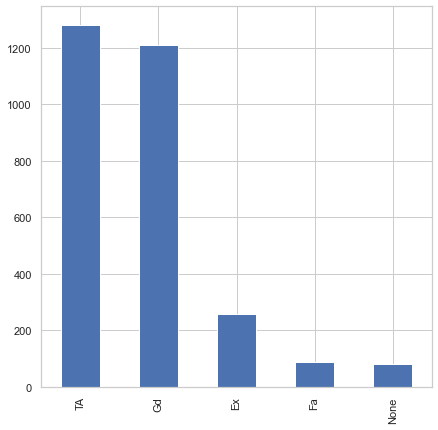

In [67]:
categorical_columns['BsmtQual'].value_counts().plot(kind='bar',figsize=[7,7])
categorical_columns['BsmtQual'].value_counts() 

TA      2606
Gd       122
Fa       104
None      82
Po         5
Name: BsmtCond, dtype: int64

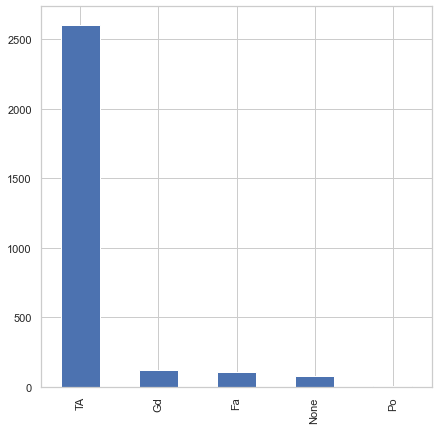

In [68]:
categorical_columns['BsmtCond'].value_counts().plot(kind='bar',figsize=[7,7])
categorical_columns['BsmtCond'].value_counts() 

No      1904
Av       418
Gd       276
Mn       239
None      82
Name: BsmtExposure, dtype: int64

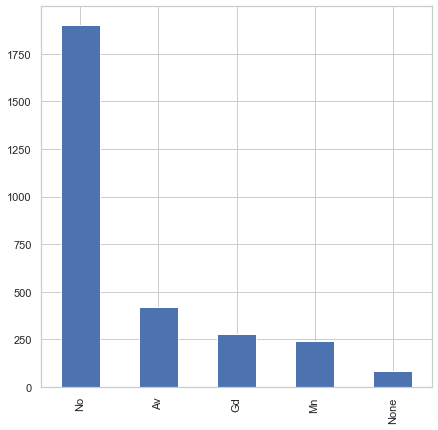

In [69]:
categorical_columns['BsmtExposure'].value_counts().plot(kind='bar',figsize=[7,7])
categorical_columns['BsmtExposure'].value_counts() 

Unf     851
GLQ     849
ALQ     429
Rec     288
BLQ     269
LwQ     154
None     79
Name: BsmtFinType1, dtype: int64

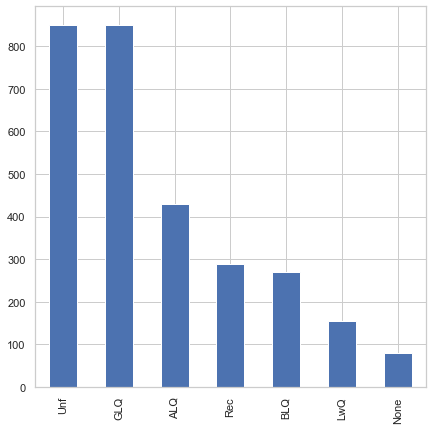

In [70]:
categorical_columns['BsmtFinType1'].value_counts().plot(kind='bar',figsize=[7,7])
categorical_columns['BsmtFinType1'].value_counts() 

GasA     2874
GasW       27
Grav        9
Wall        6
OthW        2
Floor       1
Name: Heating, dtype: int64

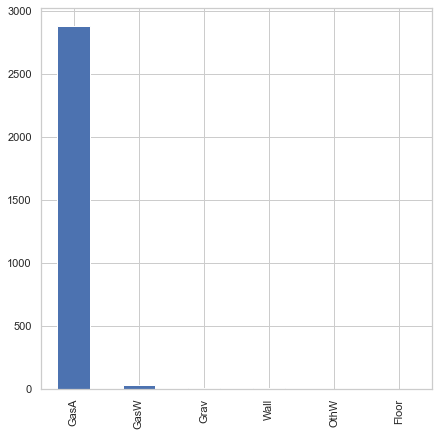

In [71]:
categorical_columns['Heating'].value_counts().plot(kind='bar',figsize=[7,7])
categorical_columns['Heating'].value_counts() 

Ex    1493
TA     857
Gd     474
Fa      92
Po       3
Name: HeatingQC, dtype: int64

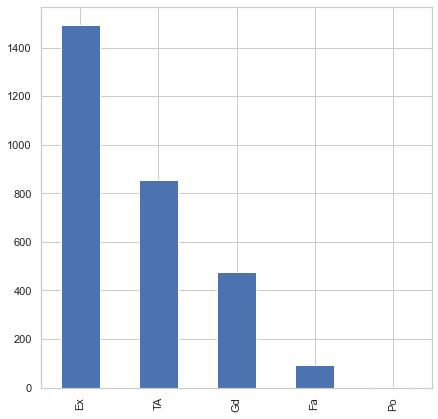

In [72]:
categorical_columns['HeatingQC'].value_counts().plot(kind='bar',figsize=[7,7])
categorical_columns['HeatingQC'].value_counts() 

Y    2723
N     196
Name: CentralAir, dtype: int64

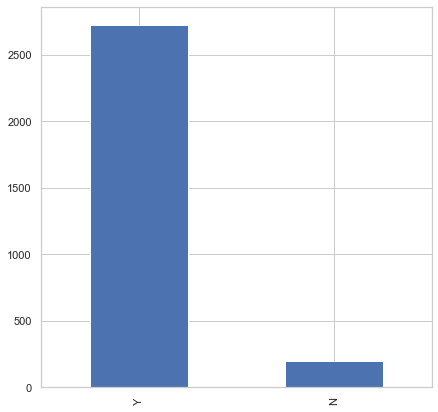

In [73]:
categorical_columns['CentralAir'].value_counts().plot(kind='bar',figsize=[7,7])
categorical_columns['CentralAir'].value_counts() 

SBrkr    2672
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: Electrical, dtype: int64

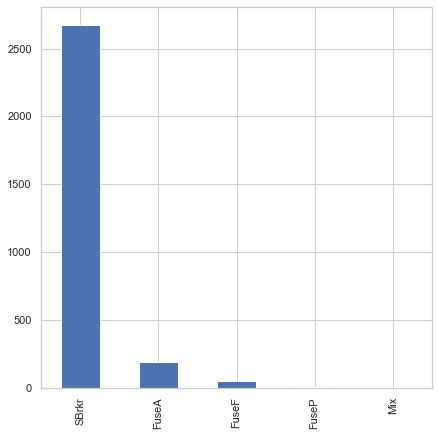

In [74]:
categorical_columns['Electrical'].value_counts().plot(kind='bar',figsize=[7,7])
categorical_columns['Electrical'].value_counts() 

TA    1493
Gd    1151
Ex     205
Fa      70
Name: KitchenQual, dtype: int64

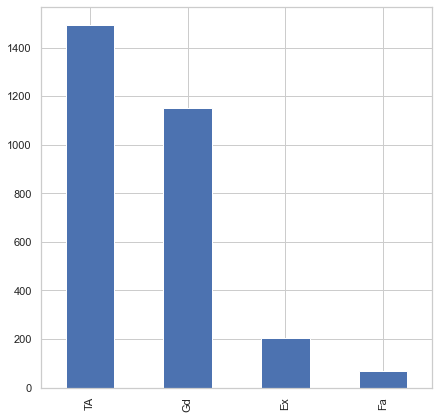

In [75]:
categorical_columns['KitchenQual'].value_counts().plot(kind='bar',figsize=[7,7])
categorical_columns['KitchenQual'].value_counts() 

Typ     2719
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
Name: Functional, dtype: int64

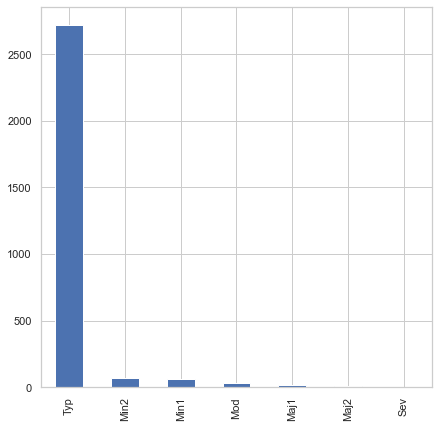

In [76]:
categorical_columns['Functional'].value_counts().plot(kind='bar',figsize=[7,7])
categorical_columns['Functional'].value_counts() 

None    1420
Gd       744
TA       592
Fa        74
Po        46
Ex        43
Name: FireplaceQu, dtype: int64

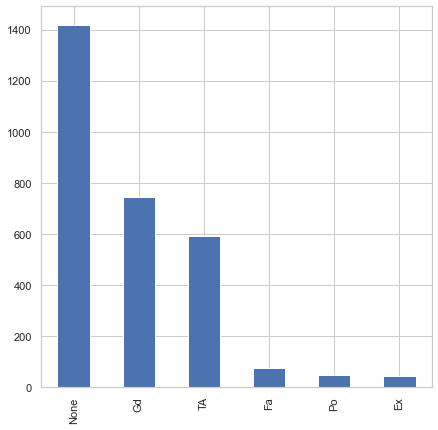

In [77]:
categorical_columns['FireplaceQu'].value_counts().plot(kind='bar',figsize=[7,7])
categorical_columns['FireplaceQu'].value_counts() 

Attchd     1723
Detchd      779
BuiltIn     186
None        157
Basment      36
2Types       23
CarPort      15
Name: GarageType, dtype: int64

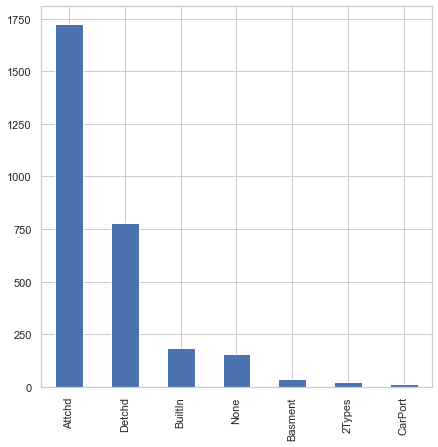

In [78]:
categorical_columns['GarageType'].value_counts().plot(kind='bar',figsize=[7,7])
categorical_columns['GarageType'].value_counts() 

Unf     1230
RFn      811
Fin      719
None     159
Name: GarageFinish, dtype: int64

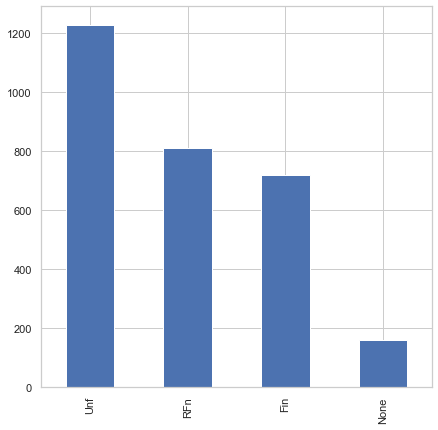

In [79]:
categorical_columns['GarageFinish'].value_counts().plot(kind='bar',figsize=[7,7])
categorical_columns['GarageFinish'].value_counts() 

TA      2604
None     159
Fa       124
Gd        24
Po         5
Ex         3
Name: GarageQual, dtype: int64

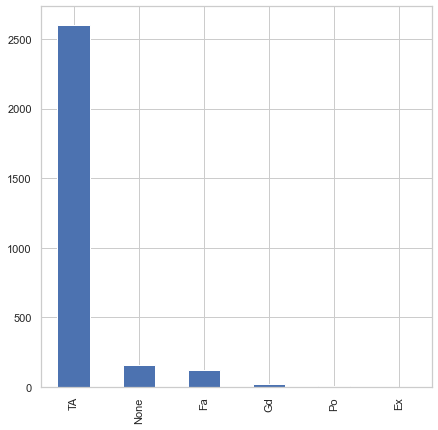

In [80]:
categorical_columns['GarageQual'].value_counts().plot(kind='bar',figsize=[7,7])
categorical_columns['GarageQual'].value_counts() 

TA      2654
None     159
Fa        74
Gd        15
Po        14
Ex         3
Name: GarageCond, dtype: int64

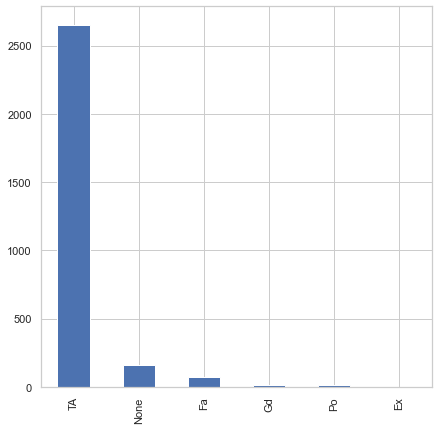

In [81]:
categorical_columns['GarageCond'].value_counts().plot(kind='bar',figsize=[7,7])
categorical_columns['GarageCond'].value_counts() 

Y    2641
N     216
P      62
Name: PavedDrive, dtype: int64

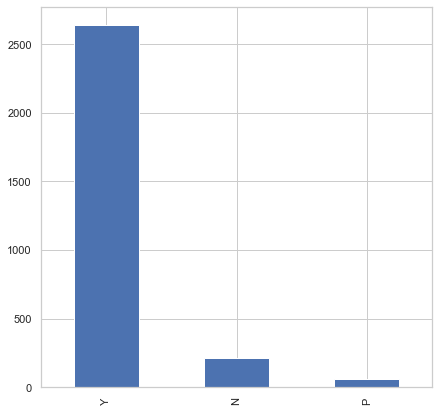

In [82]:
categorical_columns['PavedDrive'].value_counts().plot(kind='bar',figsize=[7,7])
categorical_columns['PavedDrive'].value_counts() 

WD       2526
New       239
COD        87
ConLD      26
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
Name: SaleType, dtype: int64

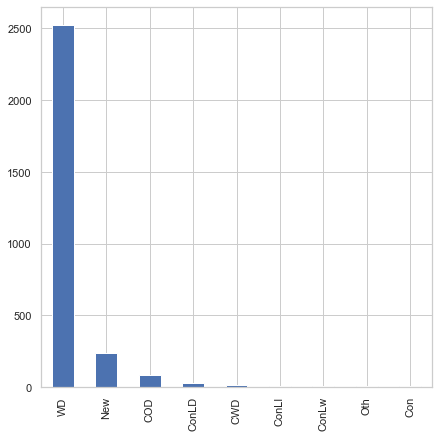

In [83]:
categorical_columns['SaleType'].value_counts().plot(kind='bar',figsize=[7,7])
categorical_columns['SaleType'].value_counts() 

Normal     2402
Partial     245
Abnorml     190
Family       46
Alloca       24
AdjLand      12
Name: SaleCondition, dtype: int64

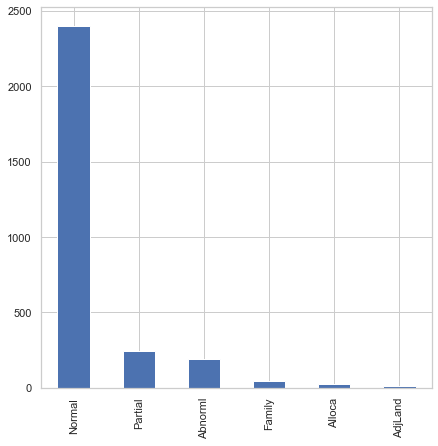

In [84]:
categorical_columns['SaleCondition'].value_counts().plot(kind='bar',figsize=[7,7])
categorical_columns['SaleCondition'].value_counts() 

0.0    1707
1.0    1172
2.0      38
3.0       2
Name: BsmtFullBath, dtype: int64

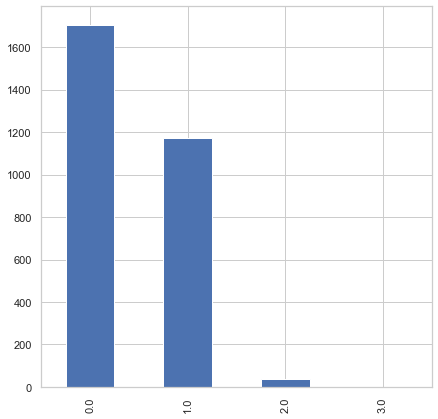

In [85]:
numeric_columns['BsmtFullBath'].value_counts().plot(kind='bar',figsize=[7,7])
numeric_columns['BsmtFullBath'].value_counts() 

0.0    2744
1.0     171
2.0       4
Name: BsmtHalfBath, dtype: int64

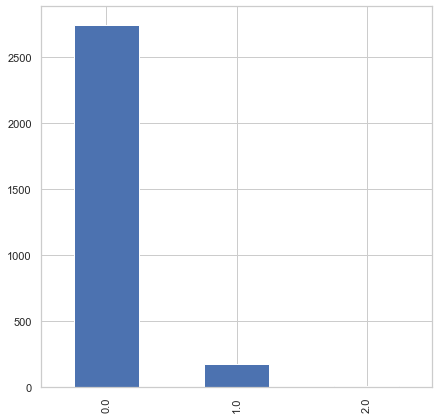

In [86]:
numeric_columns['BsmtHalfBath'].value_counts().plot(kind='bar',figsize=[7,7])
numeric_columns['BsmtHalfBath'].value_counts() 

2.0    1594
1.0     776
3.0     374
0.0     158
4.0      16
5.0       1
Name: GarageCars, dtype: int64

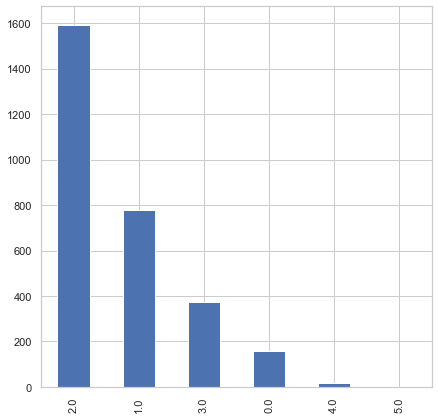

In [87]:
numeric_columns['GarageCars'].value_counts().plot(kind='bar',figsize=[7,7])
numeric_columns['GarageCars'].value_counts() 

After looking at the above variance for all the categorical columns. I have decided to remove RoofMatl,Condition2, Utilities, Street and Heating column becuase the distribution of data is very uneven in those columns.

In [88]:
categorical_columns = categorical_columns.drop(['Utilities','Condition2','Heating','Utilities','RoofMatl','Street'], axis=1)

# Feature Addition

In [89]:
numeric_columns["Age_of_house"] = numeric_columns['YrSold'] - numeric_columns['YearBuilt']

In [90]:
numeric_columns['Age_of_house'].describe()

count    2919.000000
mean       36.479959
std        30.336182
min        -1.000000
25%         7.000000
50%        35.000000
75%        54.500000
max       136.000000
Name: Age_of_house, dtype: float64

Negative minimum value is identified for age of house, which is not appropriate. Hence we need to look where the negative value is found.

In [91]:
find_neg = numeric_columns[numeric_columns['Age_of_house'] < 0]

In [92]:
find_neg

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,Age_of_house
1089,2550,20,128.0,39290,10,5,2008,2009,1224.0,4010.0,...,484,0,0,0,0,17000,10,2007,NaN,-1


The remodelling date of the house is found to be 2009. So we will change the year sold date to 2009

In [93]:
numeric_columns.loc[numeric_columns['YrSold']< numeric_columns['YearBuilt'], 'YrSold'] = 2009
numeric_columns['Age_of_house'] = numeric_columns['YrSold'] - numeric_columns['YearBuilt']
numeric_columns['Age_of_house'].describe()

count    2919.000000
mean       36.480644
std        30.335358
min         0.000000
25%         7.000000
50%        35.000000
75%        54.500000
max       136.000000
Name: Age_of_house, dtype: float64

### Combining the numeric and categorical dataframes
In the above functions, We have handled numeric and categorical features of our dataset separately. Now, we chose to combine these two data frames for further analysis.

In [94]:
combined_data = pd.concat([categorical_columns, numeric_columns], axis=1, sort=False)
combined_data

,MSZoning,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,RoofStyle,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,Age_of_house
0,RL,Reg,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,Gable,...,61,0,0,0,0,0,2,2008,208500.0,5
1,RL,Reg,Lvl,FR2,Gtl,Veenker,Feedr,1Fam,1Story,Gable,...,0,0,0,0,0,0,5,2007,181500.0,31
2,RL,IR1,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,Gable,...,42,0,0,0,0,0,9,2008,223500.0,7
3,RL,IR1,Lvl,Corner,Gtl,Crawfor,Norm,1Fam,2Story,Gable,...,35,272,0,0,0,0,2,2006,140000.0,91
4,RL,IR1,Lvl,FR2,Gtl,NoRidge,Norm,1Fam,2Story,Gable,...,84,0,0,0,0,0,12,2008,250000.0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,RM,Reg,Lvl,Inside,Gtl,MeadowV,Norm,Twnhs,2Story,Gable,...,0,0,0,0,0,0,6,2006,NaN,36
1455,RM,Reg,Lvl,Inside,Gtl,MeadowV,Norm,TwnhsE,2Story,Gable,...,24,0,0,0,0,0,4,2006,NaN,36
1456,RL,Reg,Lvl,Inside,Gtl,Mitchel,Norm,1Fam,1Story,Gable,...,0,0,0,0,0,0,9,2006,NaN,46
1457,RL,Reg,Lvl,Inside,Gtl,Mitchel,Norm,1Fam,SFoyer,Gable,...,32,0,0,0,0,700,7,2006,NaN,14


## Data Correleation

Correlation map to see how features are correlated with SalePrice

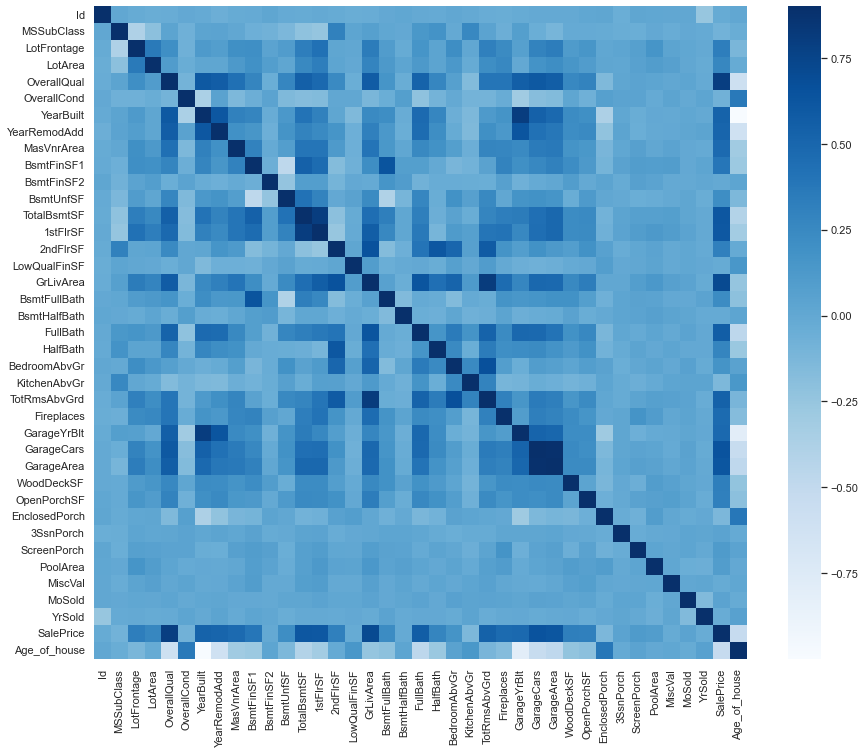

In [95]:
def correlation_matrix():
    corr_matrix = combined_data.corr()
    plt.subplots(figsize=(15,12))
    sns.color_palette("bright")
    sns.heatmap(corr_matrix, vmax=0.9, square=True, cmap="Blues")
correlation_matrix()

### Exploratory Data Analysis

We'll use visuals to explore the data in this part. This will help us better comprehend the data and the relationships between variables, allowing us to develop a more accurate model.

Our data set contains 80 columns. It takes a long time to visualize all of the data. We'll look at variables that are strongly associated (both positively and negatively) with our goal variable, "SalePrice.

In [96]:
correlated_matrix = copy_train.corr()
def obtain_correlated_features(correlated_data, threshold):
    feature = []
    value = []
    for i , index in enumerate(correlated_data.index):
        if abs(correlated_data[index]) > threshold:
            feature.append(index)
            value.append(correlated_data[index])
    df2 = pd.DataFrame(data = value, index=feature, columns=['corr value'] )
    return df2
corr_df = obtain_correlated_features(correlated_matrix['SalePrice'], 0.5)
corr_df

,corr value
OverallQual,0.790982
YearBuilt,0.522897
YearRemodAdd,0.507101
TotalBsmtSF,0.613581
1stFlrSF,0.605852
GrLivArea,0.708624
FullBath,0.560664
TotRmsAbvGrd,0.533723
GarageCars,0.640409
GarageArea,0.623431


All the variables that are substantially linked with our target variable have been obtained. Let's look at the connected data's values now.

In [97]:
correlated_data = copy_train[corr_df.index]
correlated_data.head()

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice
0,7,2003,2003,856,856,1710,2,8,2,548,208500
1,6,1976,1976,1262,1262,1262,2,6,2,460,181500
2,7,2001,2002,920,920,1786,2,6,2,608,223500
3,7,1915,1970,756,961,1717,1,7,3,642,140000
4,8,2000,2000,1145,1145,2198,2,9,3,836,250000


Let's look at the heatmap of connected data to help us think visually.

<AxesSubplot:>

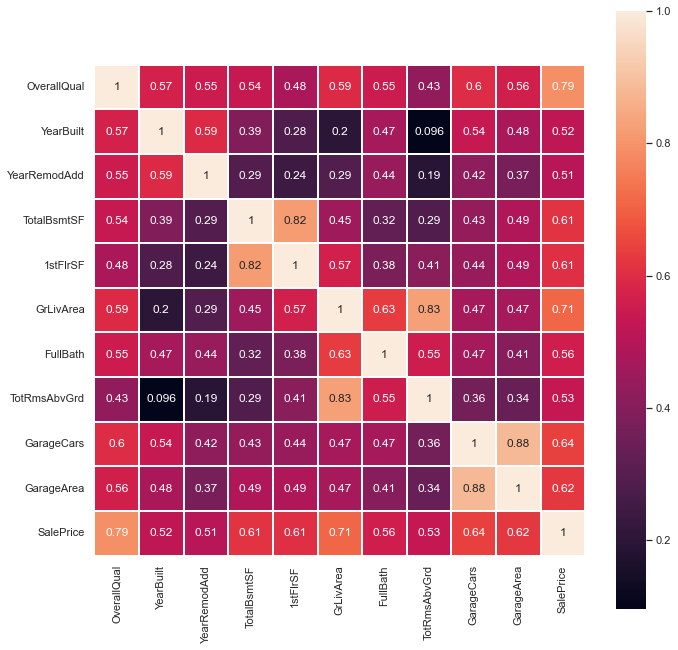

In [98]:
fig, ax = plt.subplots(figsize=(11, 11))
sns.heatmap(correlated_data.corr(), annot = True, annot_kws={'size': 12}, square=True, linecolor='w', linewidths=0.1)

The garage space, general living area, and overall quality metric are all substantially connected with our goal variable, as shown in the heatmap above.

## Bivariate Analysis

Let's start with GarageArea because it is highly associated with the goal variable.

<AxesSubplot:xlabel='GarageArea', ylabel='SalePrice'>

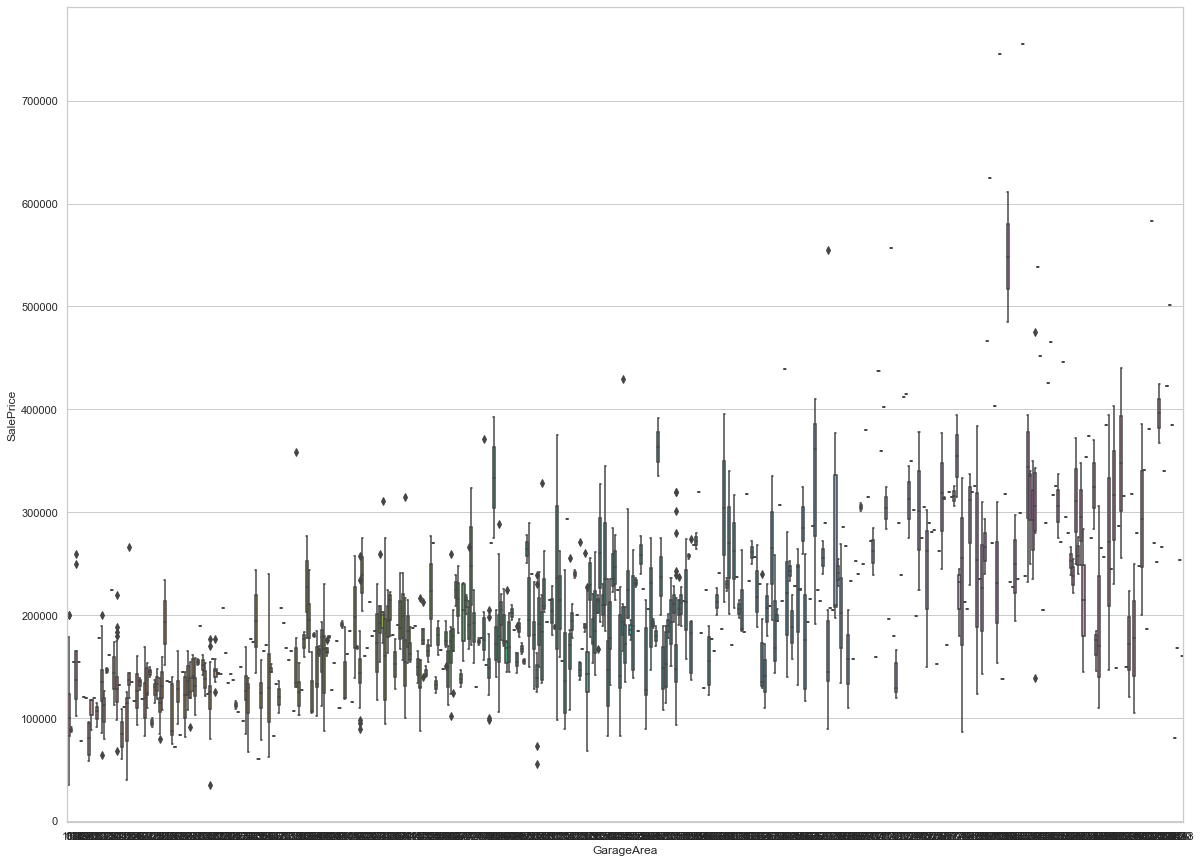

In [99]:
sns.boxplot(y='SalePrice', x = 'GarageArea', data=copy_train)

In the data, we can identify a pattern. The graph above clearly illustrates that 'SalePrice' and 'GarageArea' have a linear connection. With an increase in 'GarageArea,' the 'SalePrice' rises.

Now, because the next variable, 'OverallQual,' is highly connected with our objective variable, let's look at it.

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

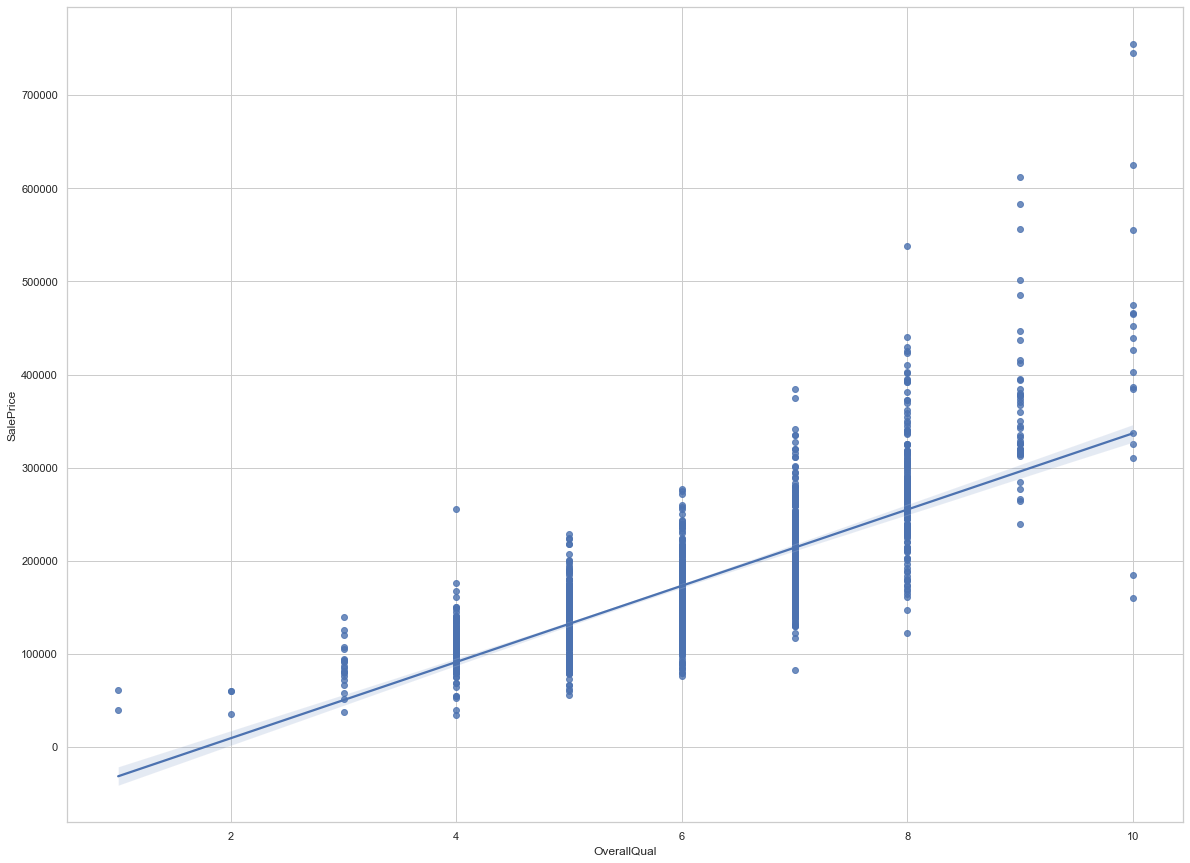

In [100]:
sns.regplot(x='OverallQual', y='SalePrice', data=copy_train, robust=True)

OverallQual and SalePrice, obviously, have a linear relationship.

Let's now examine the link between YearBuilt and SalePrice.

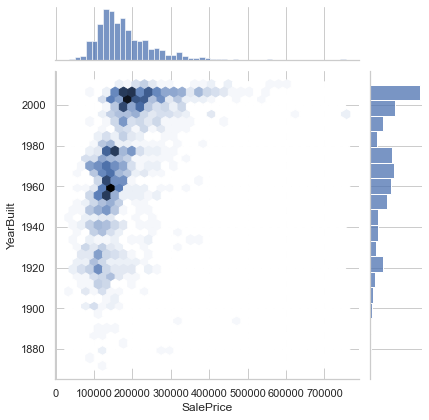

In [101]:
sns.jointplot(x='SalePrice', y='YearBuilt', data=copy_train, kind='hex')

The univariate and bivariate plots of variables are displayed in the Joint Grid plot. The distribution of 'YearBuilt' is biased towards the year 2000 and has a lengthy tail that stretches till 1900, according to the univariate plot. In the case of newly constructed residences, the linear link between the factors is more obvious.

Next, we analyze GarageYrBlt

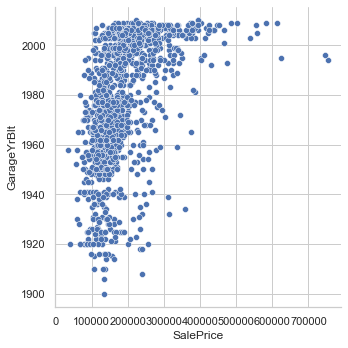

In [102]:
sns.relplot(x='SalePrice', y='GarageYrBlt', data=copy_train)

As you can see from the plot above, GarageYrBlt is similarly substantially negatively linked with the target variable, therefore there was no discernible trend in the data.

Next, we analyse our next variable ‘YearRemodAdd’.

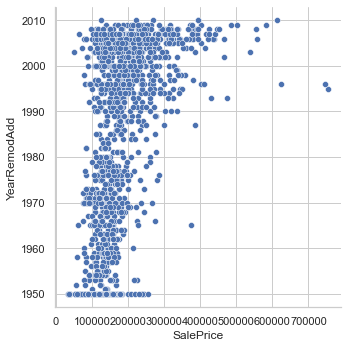

In [103]:
sns.relplot(x='SalePrice', y='YearRemodAdd', data=copy_train)

YearRemodAdd has a linear relationship with SalePrice, as shown in the graph above.

Now we analyse the next variable ‘FullBath’.

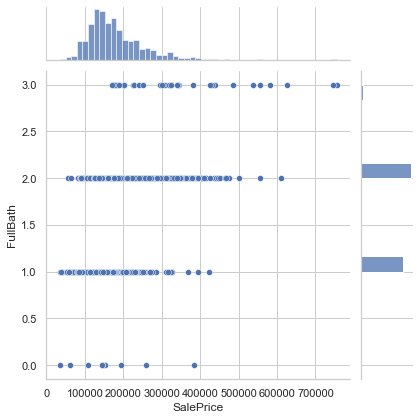

In [104]:
sns.jointplot(x='SalePrice', y='FullBath', data=copy_train)

In case of Full bath, there is no trend in data. It is highly negatively correlated with our target variable. But this helps the model to predict better.

Next, we analyze TotalBsmtSF.

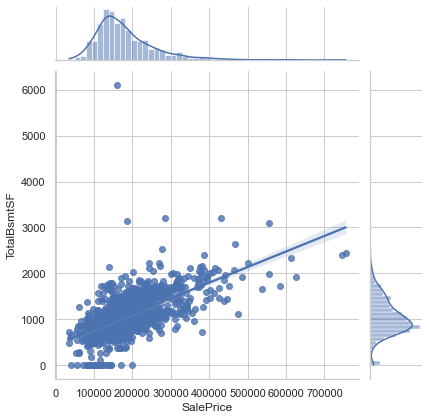

In [105]:
sns.jointplot(x='SalePrice', y='TotalBsmtSF', data=copy_train, kind='reg')

TotalBsmtSF has a strong linear trend and is substantially linked with our objective variable SalePrice.

Next, we analyze GrLivArea with SalePrice.

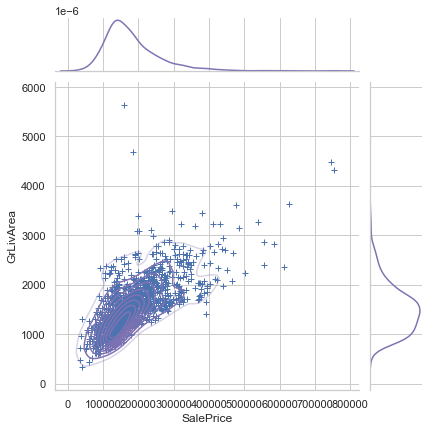

In [106]:
g = sns.jointplot(x='SalePrice', y='GrLivArea', data=copy_train, kind='kde', color='m')
g.plot_joint(plt.scatter, color='b', s=40, linewidth=1, marker='+' )
g.ax_joint.collections[0].set_alpha(0.3)

Despite a few outliers, the graph above shows a strong link between 'SalePrice' and 'GrLivArea.'

In [107]:
combined_data = pd.concat([categorical_columns, numeric_columns], axis=1, sort=False)
combined_data

,MSZoning,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,RoofStyle,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,Age_of_house
0,RL,Reg,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,Gable,...,61,0,0,0,0,0,2,2008,208500.0,5
1,RL,Reg,Lvl,FR2,Gtl,Veenker,Feedr,1Fam,1Story,Gable,...,0,0,0,0,0,0,5,2007,181500.0,31
2,RL,IR1,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,Gable,...,42,0,0,0,0,0,9,2008,223500.0,7
3,RL,IR1,Lvl,Corner,Gtl,Crawfor,Norm,1Fam,2Story,Gable,...,35,272,0,0,0,0,2,2006,140000.0,91
4,RL,IR1,Lvl,FR2,Gtl,NoRidge,Norm,1Fam,2Story,Gable,...,84,0,0,0,0,0,12,2008,250000.0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,RM,Reg,Lvl,Inside,Gtl,MeadowV,Norm,Twnhs,2Story,Gable,...,0,0,0,0,0,0,6,2006,NaN,36
1455,RM,Reg,Lvl,Inside,Gtl,MeadowV,Norm,TwnhsE,2Story,Gable,...,24,0,0,0,0,0,4,2006,NaN,36
1456,RL,Reg,Lvl,Inside,Gtl,Mitchel,Norm,1Fam,1Story,Gable,...,0,0,0,0,0,0,9,2006,NaN,46
1457,RL,Reg,Lvl,Inside,Gtl,Mitchel,Norm,1Fam,SFoyer,Gable,...,32,0,0,0,0,700,7,2006,NaN,14


In [108]:
combined_data = combined_data.drop(['SalePrice'],axis=1)
combined_data = combined_data.set_index('Id') # Settting to id because it is required in the submission format
test_dataset = test_dataset.set_index('Id')

combined_data.shape

(2919, 71)

In [109]:
combined_data.iloc[:1,2]

Id
1    Lvl
Name: LandContour, dtype: object

In [110]:
combined_data

,MSZoning,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,RoofStyle,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Age_of_house
Id,,,,,,,,,,,,,,,,,,,,,
1,RL,Reg,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,Gable,...,0,61,0,0,0,0,0,2,2008,5
2,RL,Reg,Lvl,FR2,Gtl,Veenker,Feedr,1Fam,1Story,Gable,...,298,0,0,0,0,0,0,5,2007,31
3,RL,IR1,Lvl,Inside,Gtl,CollgCr,Norm,1Fam,2Story,Gable,...,0,42,0,0,0,0,0,9,2008,7
4,RL,IR1,Lvl,Corner,Gtl,Crawfor,Norm,1Fam,2Story,Gable,...,0,35,272,0,0,0,0,2,2006,91
5,RL,IR1,Lvl,FR2,Gtl,NoRidge,Norm,1Fam,2Story,Gable,...,192,84,0,0,0,0,0,12,2008,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,RM,Reg,Lvl,Inside,Gtl,MeadowV,Norm,Twnhs,2Story,Gable,...,0,0,0,0,0,0,0,6,2006,36
2916,RM,Reg,Lvl,Inside,Gtl,MeadowV,Norm,TwnhsE,2Story,Gable,...,0,24,0,0,0,0,0,4,2006,36
2917,RL,Reg,Lvl,Inside,Gtl,Mitchel,Norm,1Fam,1Story,Gable,...,474,0,0,0,0,0,0,9,2006,46


In [111]:
combined_data.isna().sum()

MSZoning        0
LotShape        0
LandContour     0
LotConfig       0
LandSlope       0
               ..
PoolArea        0
MiscVal         0
MoSold          0
YrSold          0
Age_of_house    0
Length: 71, dtype: int64

## Transforming some numerical variables that are categorical

In [112]:
#MSSubClass=The building class
combined_data['MSSubClass'] = combined_data['MSSubClass'].apply(str)

#Changing 'OverallCond' into a categorical variable
combined_data['OverallCond'] = combined_data['OverallCond'].astype(str)

#Year and month sold are transformed into categorical features.
combined_data['YrSold'] = combined_data['YrSold'].astype(str)
combined_data['MoSold'] = combined_data['MoSold'].astype(str)

In [113]:
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')

# Below we process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(combined_data[c].values)) 
    combined_data[c] = lbl.transform(list(combined_data[c].values))
      
print('Shape all_data: {}'.format(combined_data.shape))

Shape all_data: (2919, 71)


# Getting dummy categorical features

In [114]:
combined_data = pd.get_dummies(combined_data)
print(combined_data.shape)

# ntrain = housing_dataset.shape[0]
# ntest = test_dataset.shape[0]
# copy_train = combined_data[:ntrain]
# copy_test = combined_data[ntrain:]

(2919, 190)


In [ ]:
# combined_data.to_csv('./data/output/output.csv') (commented out on purpose)